自动化EDA。用户将文件放入data文件夹之后，ipynb文件的代码可以实现完成一系列EDA。

检查文件结构，维度，变量类型，缺失值和异常值。

单变量分析

分析数值变量： 计算均值、中位数、标准差等描述性统计量。​
计算均值、中位数、标准差等描述性统计量，并绘制直方图或箱线图，了解数据分布情况。​

分析分类变量： 计算频率分布，了解各类别的分布情况。
计算频率分布，绘制条形图或饼图，了解各类别的分布情况。      

双变量分析：

数值变量之间： 使用散点图和计算相关系数，探讨变量之间的线性关系。

数值与分类变量之间： 通过箱线图或小提琴图，比较不同类别下数值变量的分布差异。
分类变量之间： 构建列联表，使用堆积条形图展示类别之间的关系。

多变量分析：

热力图： 展示多个变量之间的相关性矩阵，识别潜在的相关关系。

主成分分析（PCA）： 将高维数据降维，识别主要影响因素，便于可视化和后续分析。

时间序列分析：
趋势分析： 绘制时间序列图，观察生产指标随时间的变化趋势。
季节性分析： 识别数据中的周期性模式，例如每日、每周或每月的波动。

折线图： 展示变量随时间的变化趋势。
散点图矩阵： 同时展示多个变量之间的两两关系。
箱线图： 比较不同条件下数据的分布和离群点。 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 导入文件

In [54]:
data_path = 'data/datav1.csv'  
df = pd.read_csv(data_path)

In [ ]:
# 指定了 parse_dates 参数来解析 TIMESTAMP 列中的日期数据。
ifms_anl = pd.read_csv('data.csv', parse_dates=['TIMESTAMP'])

# 数据概览

In [55]:
def data_overview(df):
    """提供数据的基本概览"""
    print("\n======== 数据基本信息 ========")
    print(f"数据行数: {df.shape[0]}")
    print(f"数据列数: {df.shape[1]}")
    
    # 数据类型摘要
    dtypes = df.dtypes.value_counts()
    print("\n数据类型分布:")
    for dtype, count in dtypes.items():
        print(f"- {dtype}: {count}列")
    
    # 查看数据前5行
    print("\n数据前5行预览:")
    display(df.head())
    
    # 显示列信息
    print("\n列信息:")
    column_info = pd.DataFrame({
        '数据类型': df.dtypes,
        '非空值数量': df.count(),
        '空值数量': df.isnull().sum(),
        '空值百分比': (df.isnull().sum() / len(df) * 100).round(2),
        '唯一值数量': df.nunique()
    })
    column_info['空值百分比'] = column_info['空值百分比'].astype(str) + '%'
    display(column_info)
    
    # 基本统计信息,结果格式化为两位小数
    print("\n数值列的统计描述:")
    display(df.describe().T.style.format("{:.2f}"))

    # 分类列的统计描述
    cat_columns = df.select_dtypes(include=['object', 'category']).columns
    if not cat_columns.empty:
        print("\n分类列的统计描述:")
        cat_stats = pd.DataFrame({
            '唯一值数量': df[cat_columns].nunique(),
            '最常见值': [df[col].value_counts().index[0] if not df[col].value_counts().empty else None for col in cat_columns],
            '最常见值频次': [df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0 for col in cat_columns],
            '最常见值占比': [(df[col].value_counts().iloc[0] / df[col].count() * 100).round(2) if not df[col].value_counts().empty else 0 for col in cat_columns]
        })
        cat_stats['最常见值占比'] = cat_stats['最常见值占比'].astype(str) + '%'
        display(cat_stats)

In [56]:
data_overview(df)


======== 数据基本信息 ========
数据行数: 18408
数据列数: 39

数据类型分布:
- int64: 26列
- float64: 11列
- object: 2列

数据前5行预览:


,lotlogid,lottrackid,type,log,status1,status2,trayno,maept,hfcno,hfchp,...,sts1,seg1,pg1,pv2,sp2,sts2,seg2,pg2,mcno,acnc
0,31519041,357301,10,2/2/2023 9:25,1,1,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac
1,31519042,357301,10,2/2/2023 9:25,115,1,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac
2,31519050,357301,10,2/2/2023 9:26,-1,1,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac
3,31519058,357301,10,2/2/2023 9:27,-1,1,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac
4,31519059,357301,10,2/2/2023 9:27,115,2,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac



列信息:


,数据类型,非空值数量,空值数量,空值百分比,唯一值数量
lotlogid,int64,18408,0,0.0%,18408
lottrackid,int64,18408,0,0.0%,27
type,int64,18408,0,0.0%,7
log,object,18408,0,0.0%,13835
status1,int64,18408,0,0.0%,14
status2,int64,18408,0,0.0%,13
trayno,int64,18408,0,0.0%,26
maept,int64,18408,0,0.0%,1
hfcno,int64,18408,0,0.0%,2
hfchp,int64,18408,0,0.0%,1



数值列的统计描述:


,count,mean,std,min,25%,50%,75%,max
lotlogid,18408.00,31758229.79,307317.97,31519041.00,31537380.25,31622685.00,31794361.75,32500550.00
lottrackid,18408.00,357915.09,771.56,357301.00,357340.00,357590.00,358029.00,359771.00
type,18408.00,25.05,7.99,10.00,22.00,22.00,30.00,40.00
status1,18408.00,4.25,23.80,-1.00,-1.00,-1.00,-1.00,115.00
status2,18408.00,3.41,2.67,0.00,1.00,3.00,6.00,15.00
trayno,18408.00,501.36,262.55,34.00,280.00,577.00,749.00,861.00
maept,18408.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00
hfcno,18408.00,5.44,0.50,5.00,5.00,5.00,6.00,6.00
hfchp,18408.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00
yakitemp,18408.00,60.00,0.00,60.00,60.00,60.00,60.00,60.00



分类列的统计描述:


,唯一值数量,最常见值,最常见值频次,最常见值占比
log,13835,2/2/2023 23:42,7,0.04%
acnc,2,ac,10096,54.85%


count: 数据集中元素的数量。
mean: 数据的平均值。
std: 标准差，表示数据的分散程度。
min: 数据中的最小值。
25%: 第一四分位数，表示数据中25%的值小于或等于这个值。
50%: 中位数，表示数据中50%的值小于或等于这个值。
75%: 第三四分位数，表示数据中75%的值小于或等于这个值。
max: 数据中的最大值

# 查看某个数据的细节

In [ ]:
def show_value_counts(series):
    value_counts = series.value_counts()
    
    print(f"值统计：")
    print(value_counts)
    print(f"\n共有 {len(value_counts)} 个不同的值")
    
    plt.figure(figsize=(10, 8))
    plt.pie(value_counts.values, 
            labels=[f'{label}\n({count}个)' for label, count in zip(value_counts.index, value_counts.values)],
            autopct='%1.1f%%',
            colors=['lightblue', 'lightgreen', 'lightcoral', 'wheat'],  # 自定义颜色
            explode=[0.1] * len(value_counts),  # 扇形分离效果
            shadow=True)  # 添加阴影
    plt.title('数据分布饼图')
    plt.axis('equal')
    plt.show()

# 处理数据中的缺失值

In [ ]:
import missingno as msno

In [57]:
def handle_missing_values(df):
    missing_cols = df.columns[df.isnull().any()].tolist()
    
    if not missing_cols:
        print("数据中没有缺失值，无需处理。")
        return df
    
    print(f"\n======== 缺失值处理 ========")
    print(f"发现以下{len(missing_cols)}列含有缺失值:")
    
    for col in missing_cols:
        missing_pct = (df[col].isnull().sum() / len(df) * 100).round(2)
        print(f"- {col}: {df[col].isnull().sum()}个缺失值 ({missing_pct}%)")
    
    strategies = {
        '删除': '删除含有缺失值的行',
        '均值填充': '对数值列使用均值填充',
        '中位数填充': '对数值列使用中位数填充',
        '众数填充': '对分类列使用众数填充',
        '0填充': '使用0填充缺失值',
        '指定值填充': '使用指定的值填充缺失值',
        '不处理': '保留缺失值不做处理'
    }
    
    print("\n可用的缺失值处理策略:")
    for key, desc in strategies.items():
        print(f"- {key}: {desc}")
    
    strategy = input("\n请选择缺失值处理策略 (默认为不处理): ") or '不处理'
    
    if strategy not in strategies:
        print(f"未知策略: {strategy}，将默认不处理缺失值。")
        return df
    
    df_clean = df.copy()
    
    if strategy == '删除':
        df_clean = df.dropna()
        print(f"已删除含有缺失值的行，数据形状从 {df.shape} 变为 {df_clean.shape}")
    
    elif strategy == '均值填充':
        for col in missing_cols:
            if pd.api.types.is_numeric_dtype(df[col]):
                df_clean[col] = df[col].fillna(df[col].mean())
                print(f"已对列 '{col}' 使用均值 {df[col].mean():.2f} 填充")
            else:
                print(f"列 '{col}' 不是数值类型，跳过均值填充")
    
    elif strategy == '中位数填充':
        for col in missing_cols:
            if pd.api.types.is_numeric_dtype(df[col]):
                df_clean[col] = df[col].fillna(df[col].median())
                print(f"已对列 '{col}' 使用中位数 {df[col].median():.2f} 填充")
            else:
                print(f"列 '{col}' 不是数值类型，跳过中位数填充")
    
    elif strategy == '众数填充':
        for col in missing_cols:
            mode_value = df[col].mode()[0]
            df_clean[col] = df[col].fillna(mode_value)
            print(f"已对列 '{col}' 使用众数 '{mode_value}' 填充")
    
    elif strategy == '0填充':
        for col in missing_cols:
            df_clean[col] = df[col].fillna(0)
            print(f"已对列 '{col}' 使用0填充")
    
    elif strategy == '指定值填充':
        for col in missing_cols:
            fill_value = input(f"请输入用于填充列 '{col}' 的值: ")
            # 尝试转换为原始列的数据类型
            try:
                if pd.api.types.is_numeric_dtype(df[col]):
                    fill_value = float(fill_value)
                df_clean[col] = df[col].fillna(fill_value)
                print(f"已对列 '{col}' 使用 '{fill_value}' 填充")
            except:
                print(f"无法将 '{fill_value}' 转换为合适的类型，跳过此列")
    
    elif strategy == '不处理':
        print("保留缺失值不做处理")
    
    return df_clean

# 检测并处理数据中的异常值

In [59]:
def handle_outliers(df):
    """检测并处理数据中的异常值"""
    print("\n======== 异常值检测与处理 ========")
    
    # 只对数值列进行异常值检测
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    if not numeric_cols:
        print("数据中没有数值列，无法检测异常值。")
        return df
    
    print(f"使用IQR方法检测异常值 (数值列: {len(numeric_cols)}列)")
    
    outliers_summary = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_pct = round((len(outliers) / len(df) * 100), 2)
        
        if not outliers.empty:
            outliers_summary[col] = {
                'count': len(outliers),
                'percentage': outlier_pct,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
    
    if not outliers_summary:
        print("未检测到异常值。")
        return df
    
    print("\n检测到以下列存在异常值:")
    for col, stats in outliers_summary.items():
        print(f"- {col}: {stats['count']}个异常值 ({stats['percentage']}%), 范围: [{stats['lower_bound']:.2f}, {stats['upper_bound']:.2f}]")
    
    # 绘制箱线图来展示异常值
    n_cols = min(3, len(outliers_summary))
    n_rows = (len(outliers_summary) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(n_cols*5, n_rows*4))
    for i, col in enumerate(outliers_summary.keys()):
        plt.subplot(n_rows, n_cols, i+1)
        sns.boxplot(x=df[col])
        plt.title(f"{col}的箱线图")
        plt.tight_layout()
    plt.savefig('images/outliers_boxplot.png')
    plt.show()
    
    strategies = {
        '删除': '删除含有异常值的行',
        '替换为上下界': '将异常值替换为上下界值',
        '替换为均值': '将异常值替换为均值',
        '替换为中位数': '将异常值替换为中位数',
        '不处理': '保留异常值不做处理'
    }
    
    print("\n可用的异常值处理策略:")
    for key, desc in strategies.items():
        print(f"- {key}: {desc}")
    
    strategy = input("\n请选择异常值处理策略 (默认为不处理): ") or '不处理'
    
    if strategy not in strategies:
        print(f"未知策略: {strategy}，将默认不处理异常值。")
        return df
    
    df_clean = df.copy()
    
    if strategy == '删除':
        original_shape = df_clean.shape
        for col in outliers_summary.keys():
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        
        print(f"已删除含有异常值的行，数据形状从 {original_shape} 变为 {df_clean.shape}")
    
    elif strategy == '替换为上下界':
        for col in outliers_summary.keys():
            stats = outliers_summary[col]
            lower_bound = stats['lower_bound']
            upper_bound = stats['upper_bound']
            
            # 将小于下界的值替换为下界值
            df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
            # 将大于上界的值替换为上界值
            df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
            
            print(f"已将 '{col}' 列的异常值替换为上下界: [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    elif strategy == '替换为均值':
        for col in outliers_summary.keys():
            stats = outliers_summary[col]
            lower_bound = stats['lower_bound']
            upper_bound = stats['upper_bound']
            mean_value = df[col].mean()
            
            # 替换异常值为均值
            mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
            df_clean.loc[mask, col] = mean_value
            
            print(f"已将 '{col}' 列的异常值替换为均值: {mean_value:.2f}")
    
    elif strategy == '替换为中位数':
        for col in outliers_summary.keys():
            stats = outliers_summary[col]
            lower_bound = stats['lower_bound']
            upper_bound = stats['upper_bound']
            median_value = df[col].median()
            
            # 替换异常值为中位数
            mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
            df_clean.loc[mask, col] = median_value
            
            print(f"已将 '{col}' 列的异常值替换为中位数: {median_value:.2f}")
    
    elif strategy == '不处理':
        print("保留异常值不做处理")
    
    return df_clean


======== 异常值检测与处理 ========
使用IQR方法检测异常值 (数值列: 37列)

检测到以下列存在异常值:
- lotlogid: 2750个异常值 (14.94%), 范围: [31151908.00, 32179834.00]
- lottrackid: 2750个异常值 (14.94%), 范围: [356306.50, 359062.50]
- status1: 1338个异常值 (7.27%), 范围: [-1.00, -1.00]
- status2: 266个异常值 (1.45%), 范围: [-6.50, 13.50]
- plc2: 2680个异常值 (14.56%), 范围: [-30.00, 50.00]
- plc5: 1118个异常值 (6.07%), 范围: [-46.50, 77.50]
- plc6: 4355个异常值 (23.66%), 范围: [0.00, 0.00]
- plc7: 3376个异常值 (18.34%), 范围: [50.50, 150.50]
- plc8: 6054个异常值 (32.89%), 范围: [426.00, 450.00]
- plc9: 2901个异常值 (15.76%), 范围: [0.00, 0.00]
- plc10: 1674个异常值 (9.09%), 范围: [0.00, 0.00]
- pv1: 2776个异常值 (15.08%), 范围: [280.31, 1239.81]
- sp1: 4759个异常值 (25.85%), 范围: [880.00, 880.00]
- sts1: 235个异常值 (1.28%), 范围: [18.00, 18.00]
- pg1: 636个异常值 (3.46%), 范围: [-5.50, 14.50]
- pv2: 3176个异常值 (17.25%), 范围: [0.68, 1.20]
- sp2: 365个异常值 (1.98%), 范围: [1.00, 1.00]
- sts2: 3473个异常值 (18.87%), 范围: [15.50, 19.50]
- pg2: 801个异常值 (4.35%), 范围: [2.00, 2.00]


C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2490215406.py:50: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2490215406.py:50: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2490215406.py:50: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2490215406.py:50: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2490215406.py:50: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2490215406.py:50: Use

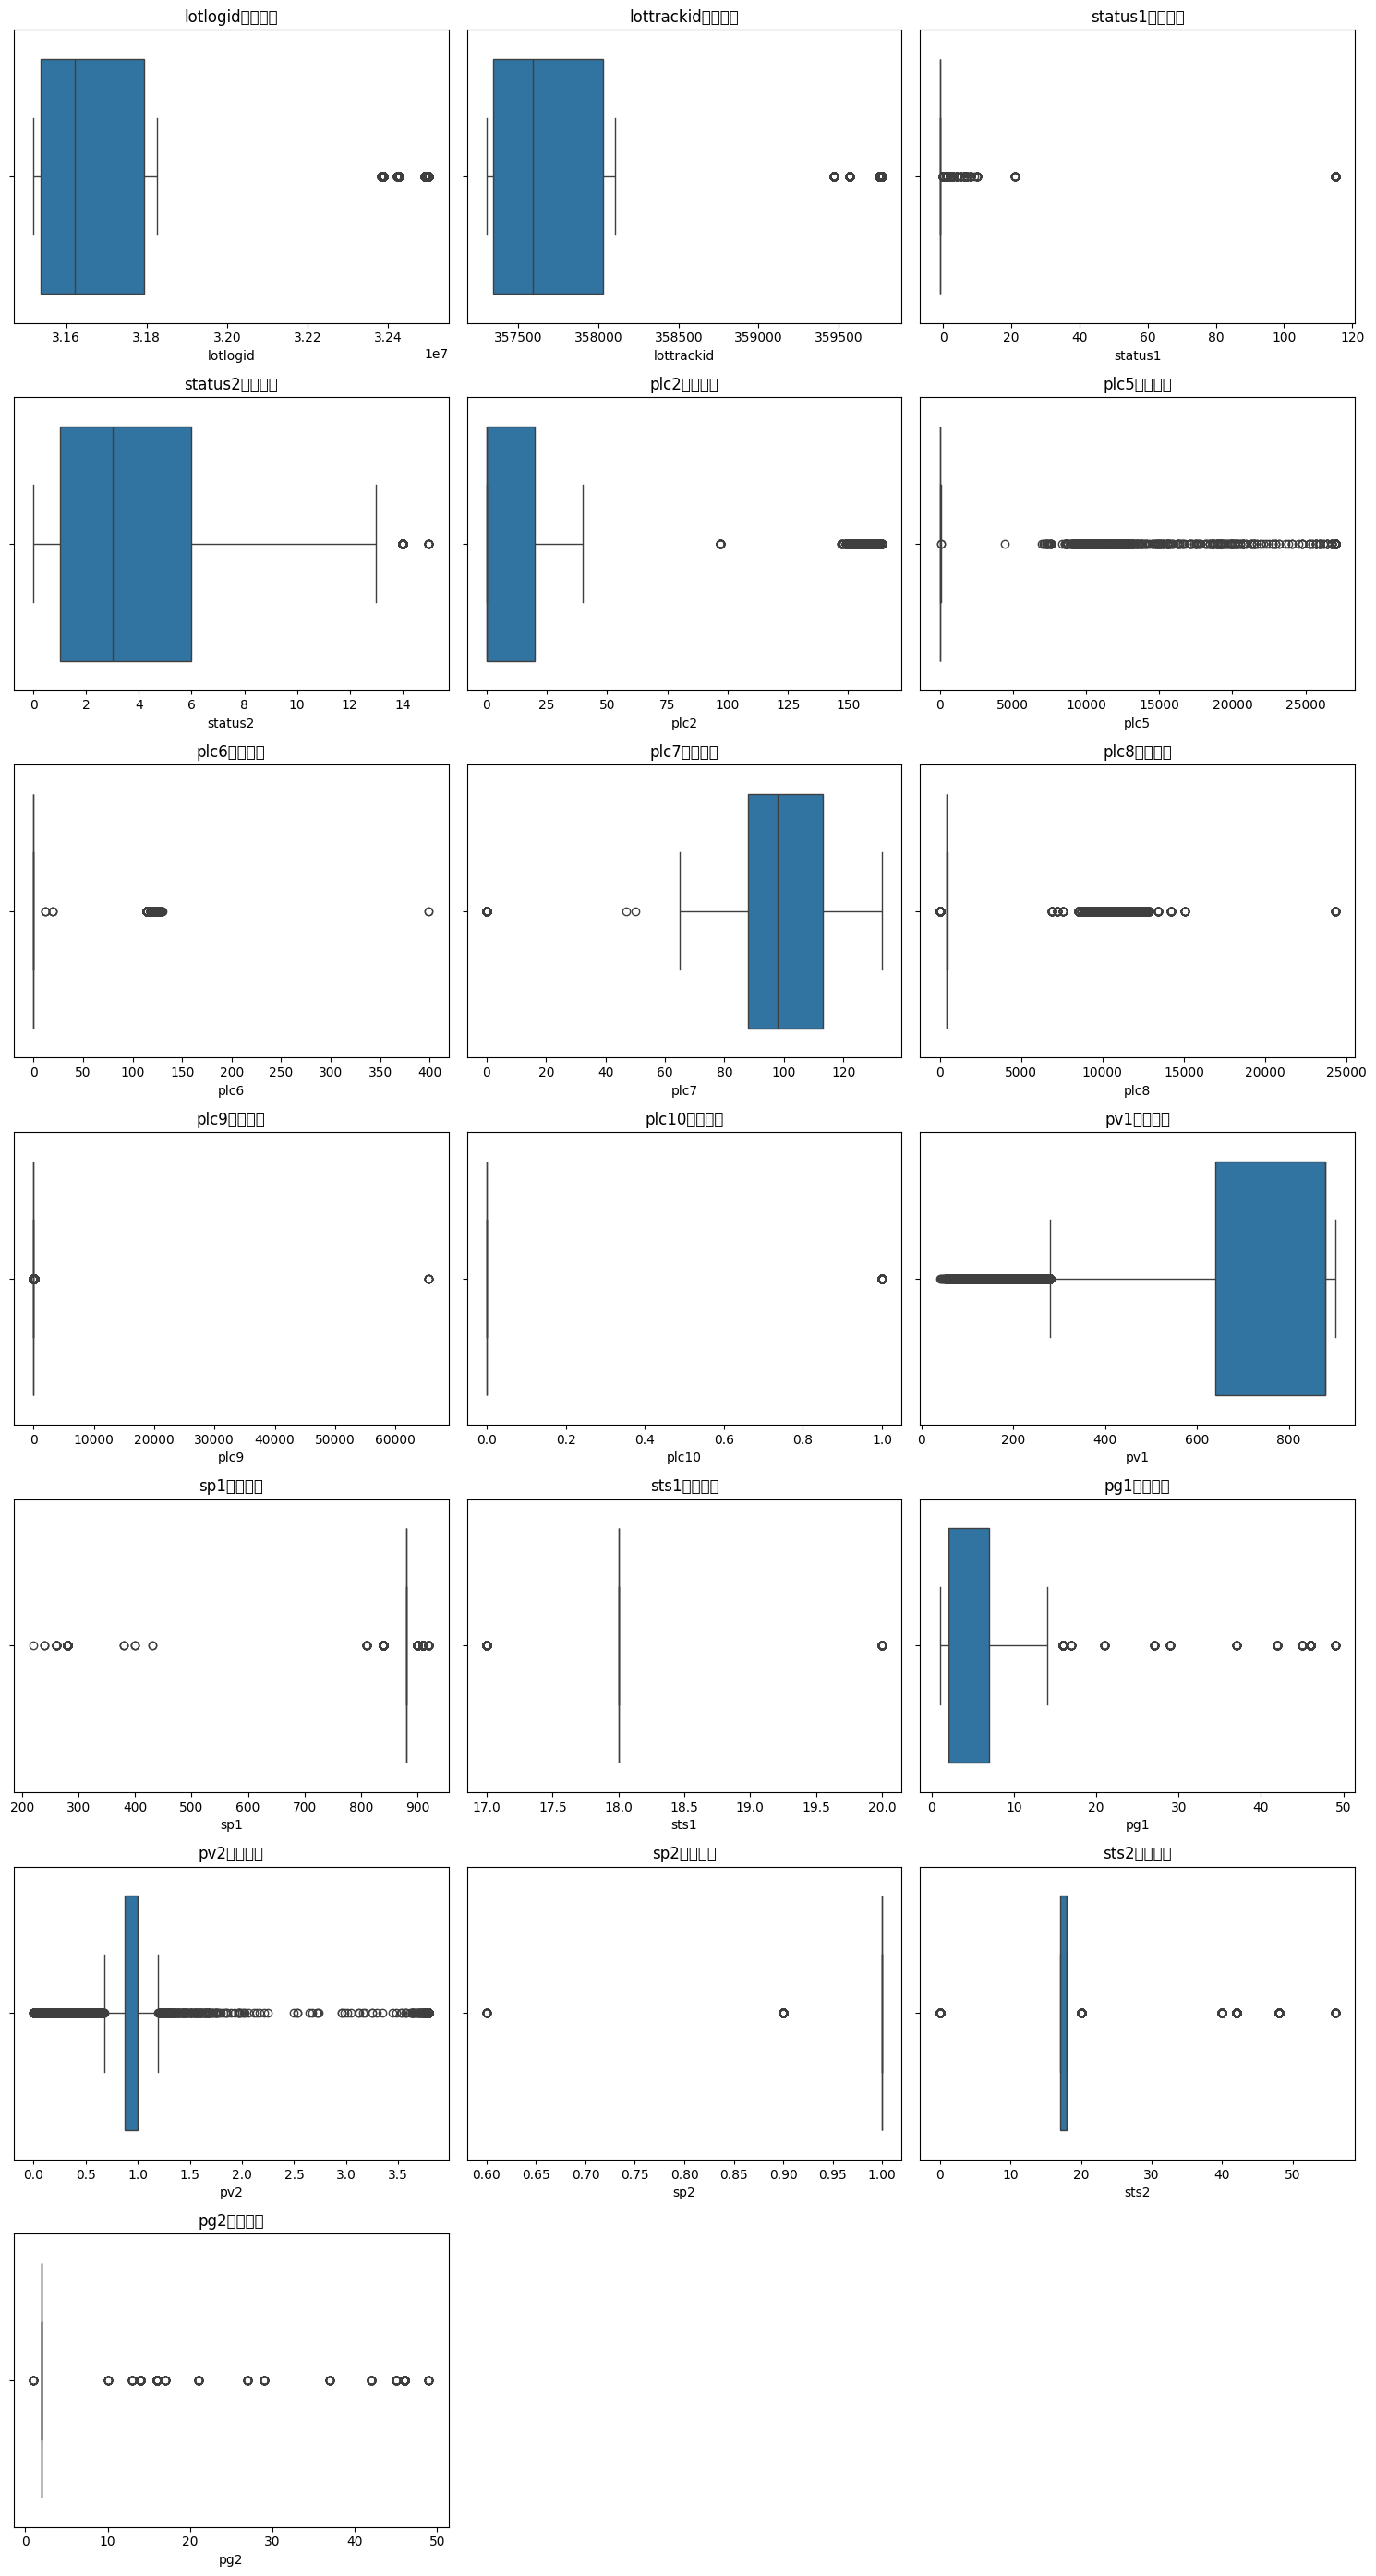


可用的异常值处理策略:
- 删除: 删除含有异常值的行
- 替换为上下界: 将异常值替换为上下界值
- 替换为均值: 将异常值替换为均值
- 替换为中位数: 将异常值替换为中位数
- 不处理: 保留异常值不做处理
保留异常值不做处理


,lotlogid,lottrackid,type,log,status1,status2,trayno,maept,hfcno,hfchp,...,sts1,seg1,pg1,pv2,sp2,sts2,seg2,pg2,mcno,acnc
0,31519041,357301,10,2/2/2023 9:25,1,1,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac
1,31519042,357301,10,2/2/2023 9:25,115,1,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac
2,31519050,357301,10,2/2/2023 9:26,-1,1,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac
3,31519058,357301,10,2/2/2023 9:27,-1,1,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac
4,31519059,357301,10,2/2/2023 9:27,115,2,557,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18403,32500530,359771,40,6/16/2023 10:25,-1,3,52,2,6,2,...,18.0,3.0,7.0,NaN,NaN,48.0,NaN,NaN,2,nc
18404,32500535,359771,40,6/16/2023 10:26,-1,3,52,2,6,2,...,17.0,1.0,7.0,NaN,NaN,0.0,NaN,NaN,2,nc
18405,32500542,359771,40,6/16/2023 10:27,-1,3,52,2,6,2,...,17.0,1.0,7.0,NaN,NaN,0.0,NaN,NaN,2,nc
18406,32500545,359771,40,6/16/2023 10:27,0,3,52,2,6,2,...,17.0,1.0,7.0,NaN,NaN,0.0,NaN,NaN,2,nc


In [60]:
handle_outliers(df)

C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2018432042.py:7: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  plt.savefig(f'images/{col}_histogram.png')
C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2018432042.py:7: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  plt.savefig(f'images/{col}_histogram.png')
C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2018432042.py:7: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.savefig(f'images/{col}_histogram.png')
C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2018432042.py:7: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  plt.savefig(f'images/{col}_histogram.png')
C:\Users\splsip258\AppData\Local\Temp\ipykernel_16984\2018432042.py:7: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  plt

KeyboardInterrupt: 

d:\aiml\skc_ai\venv_skc_ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\aiml\skc_ai\venv_skc_ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\aiml\skc_ai\venv_skc_ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


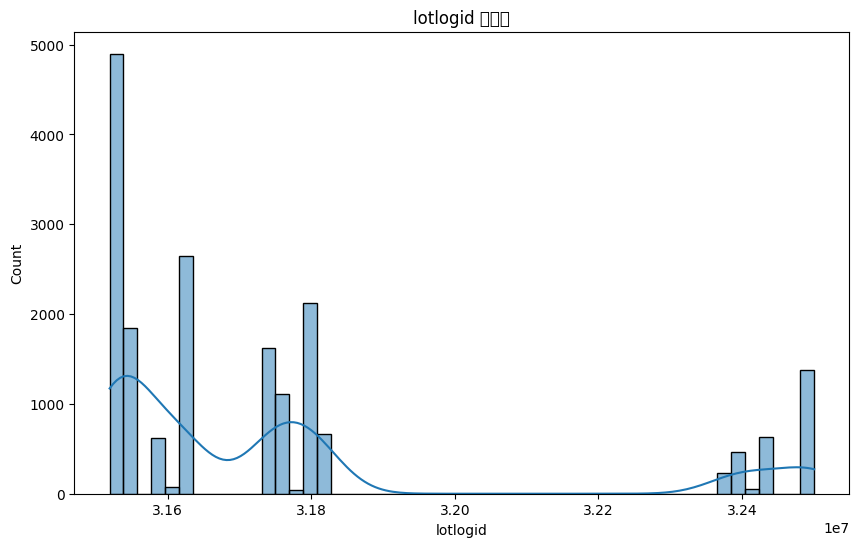

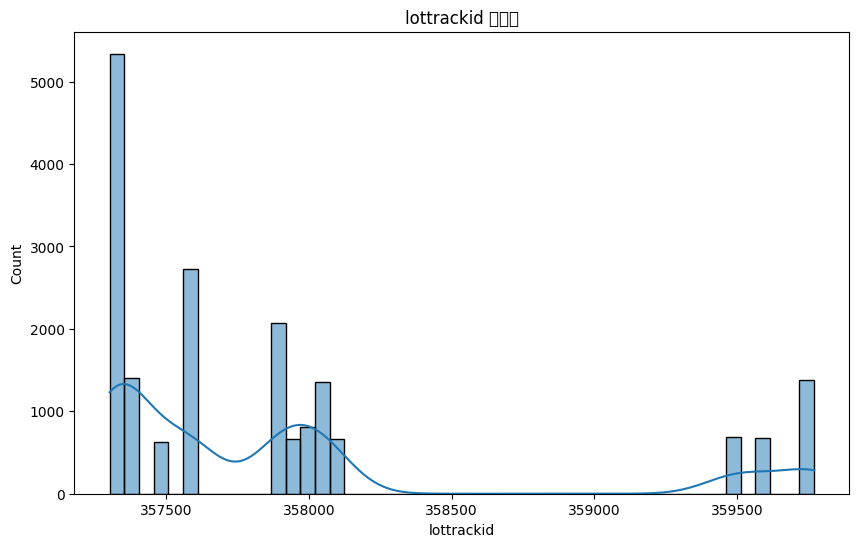

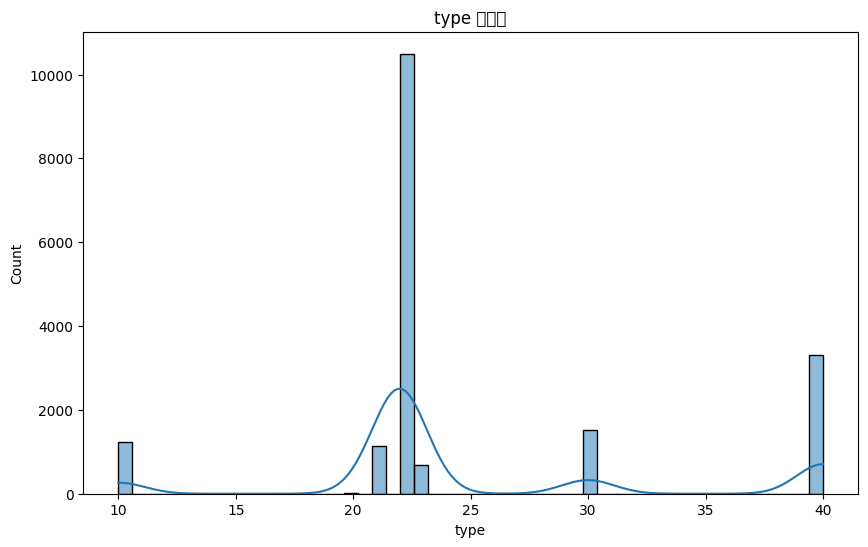

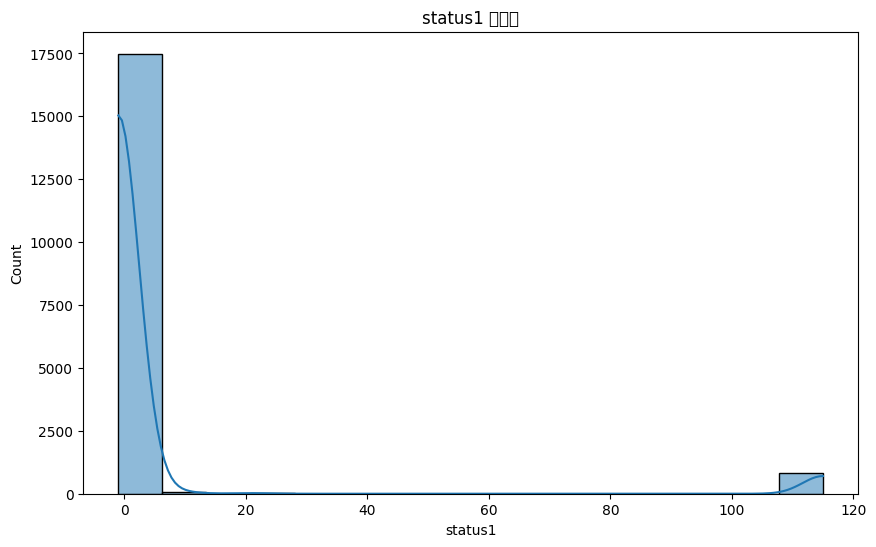

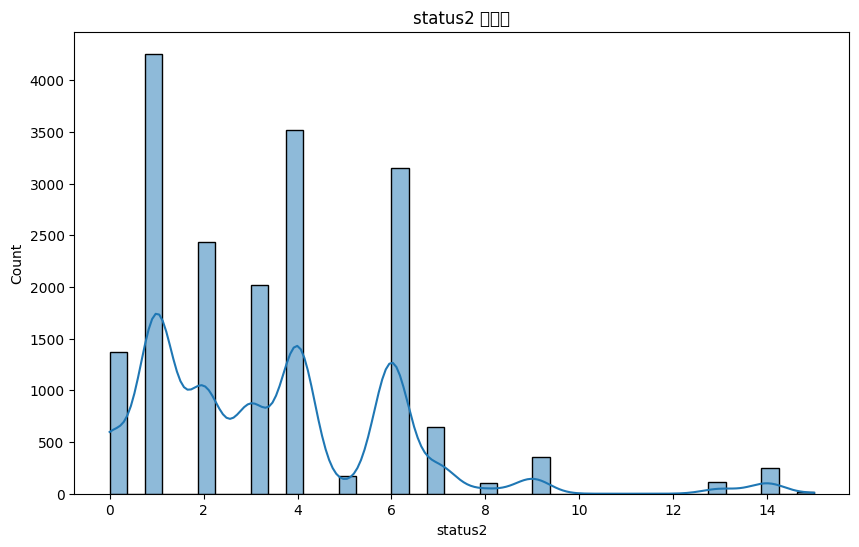

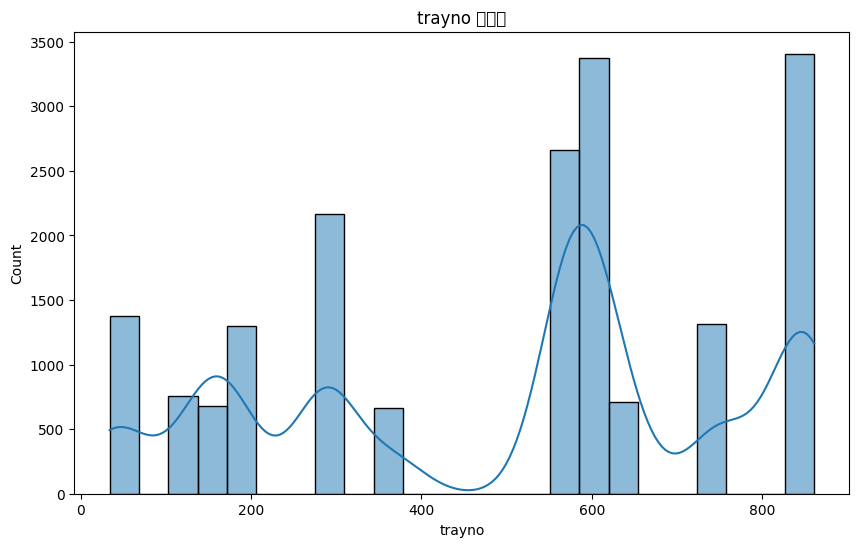

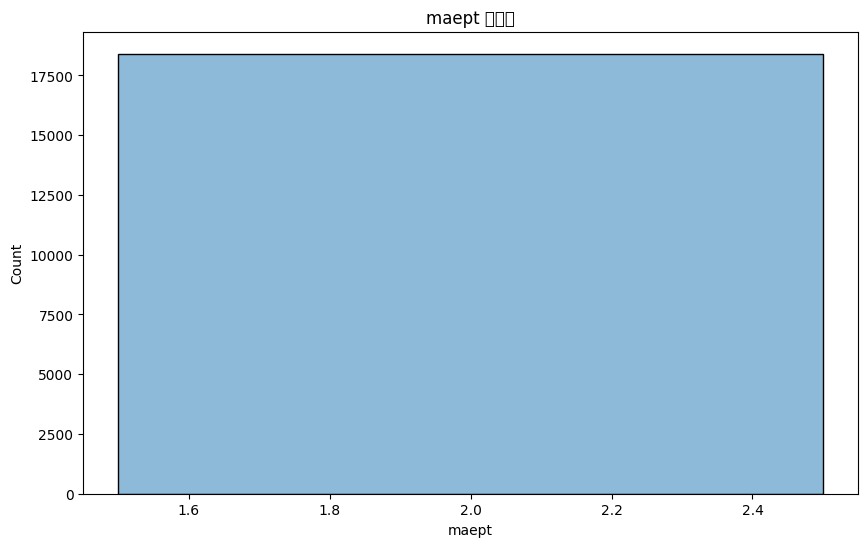

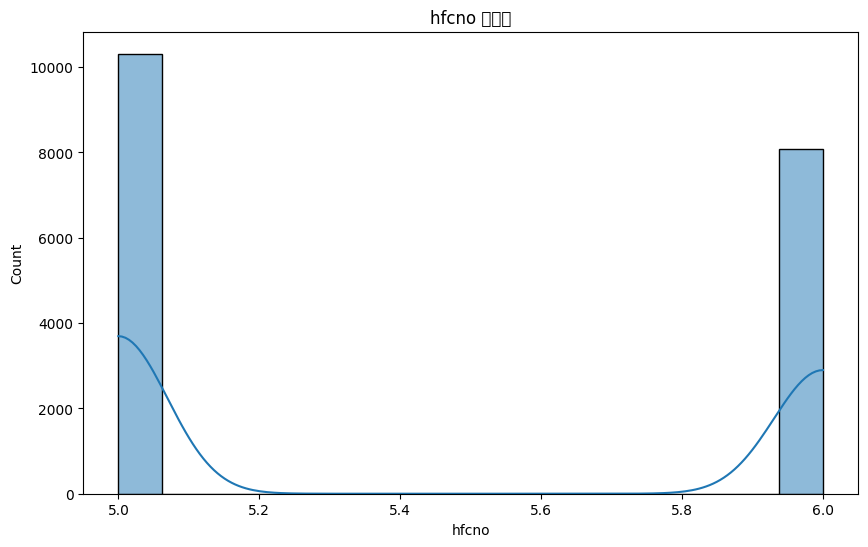

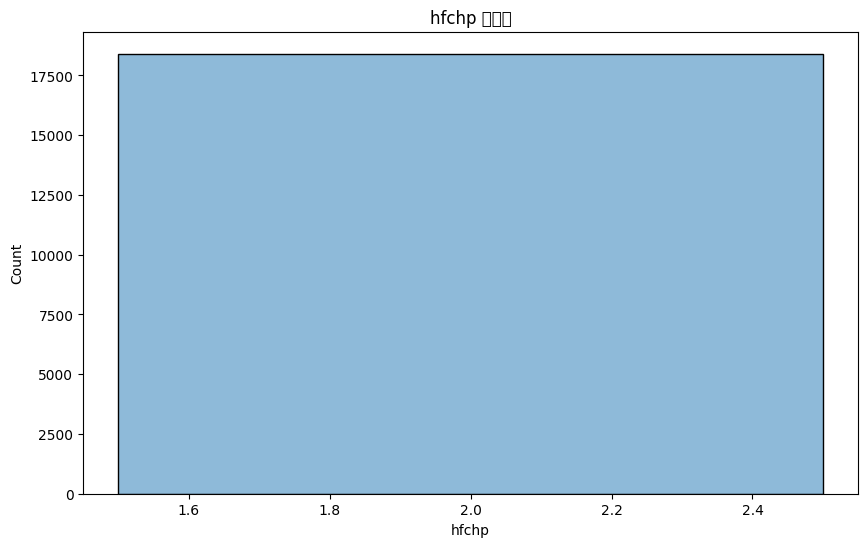

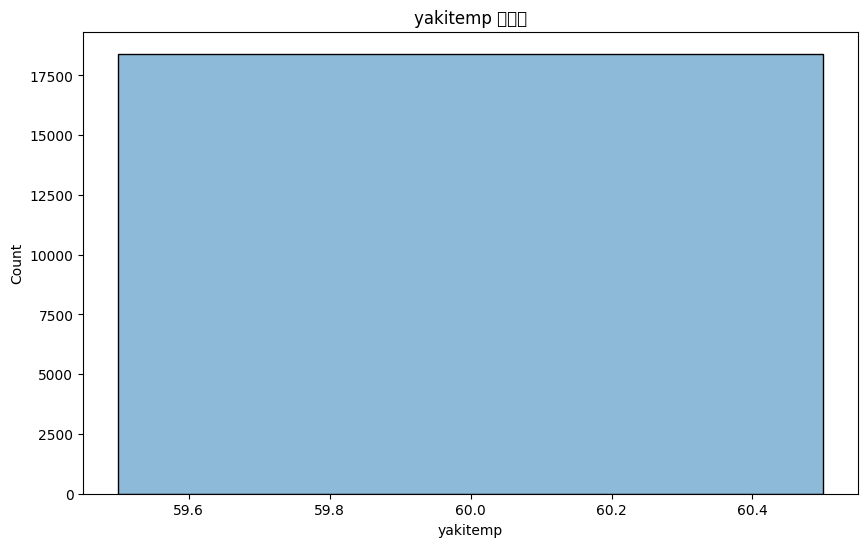

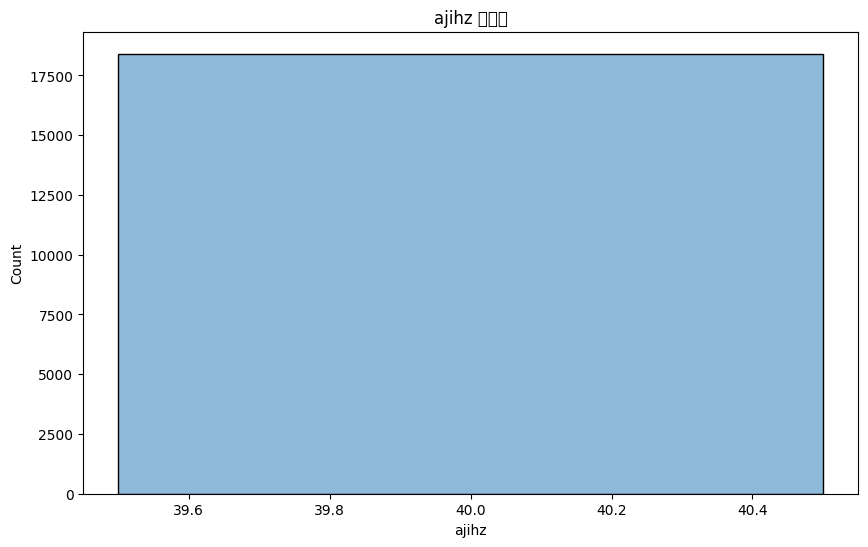

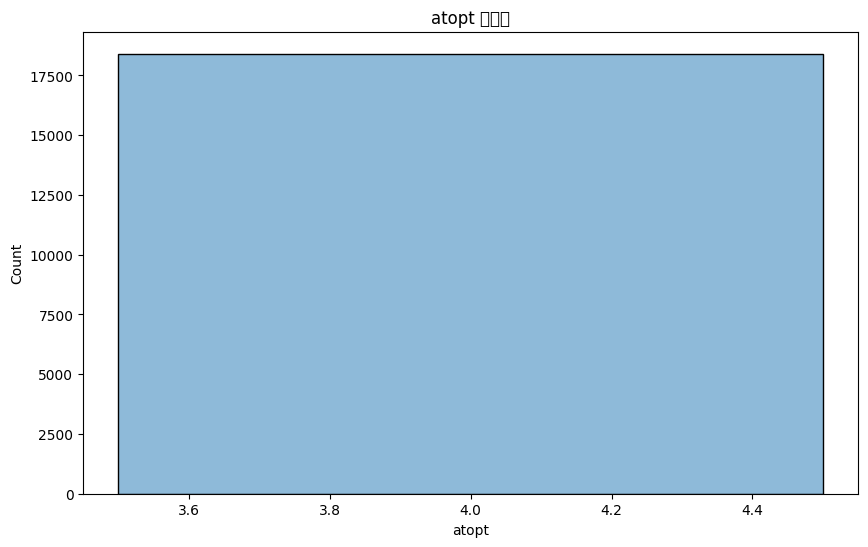

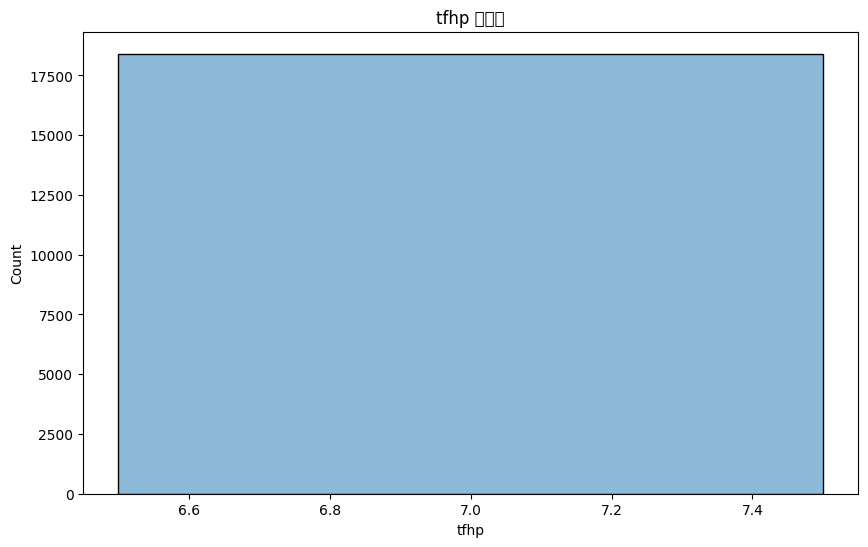

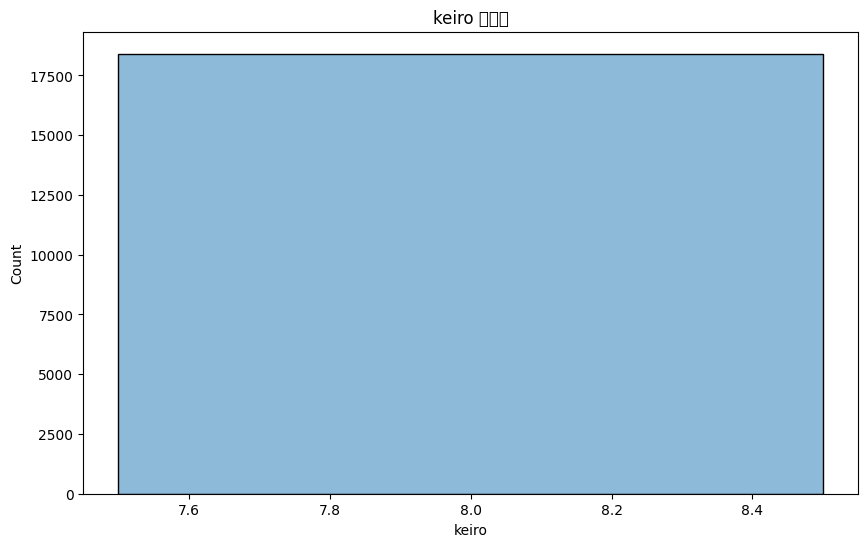

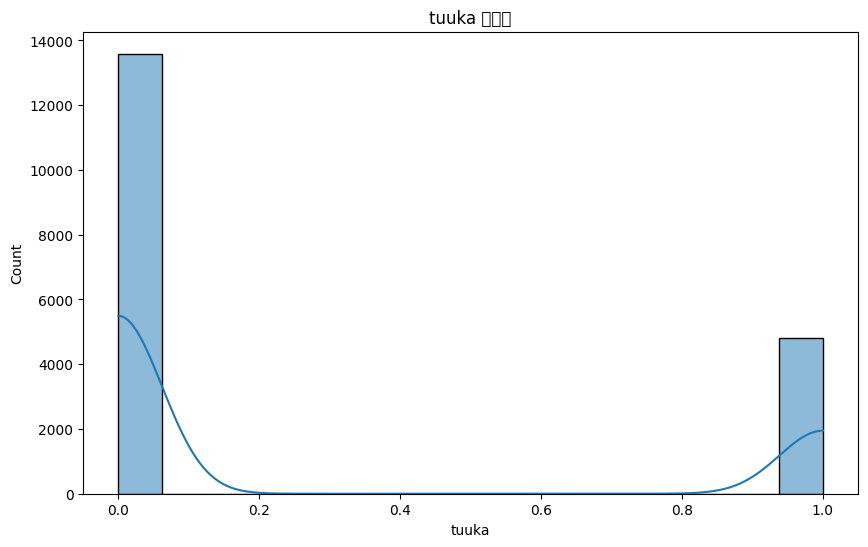

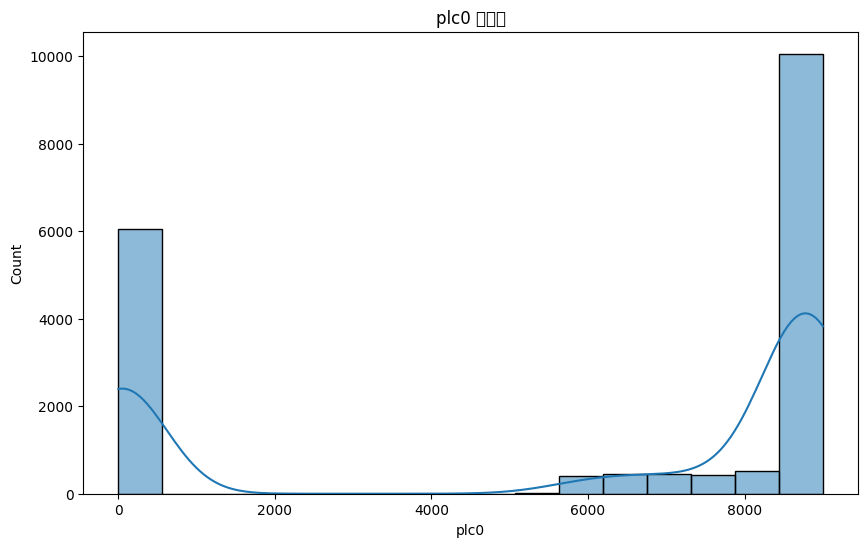

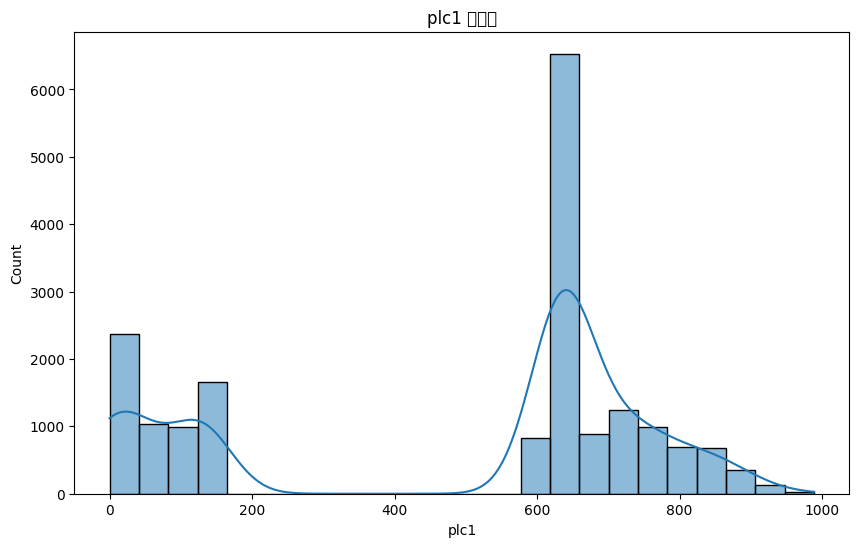

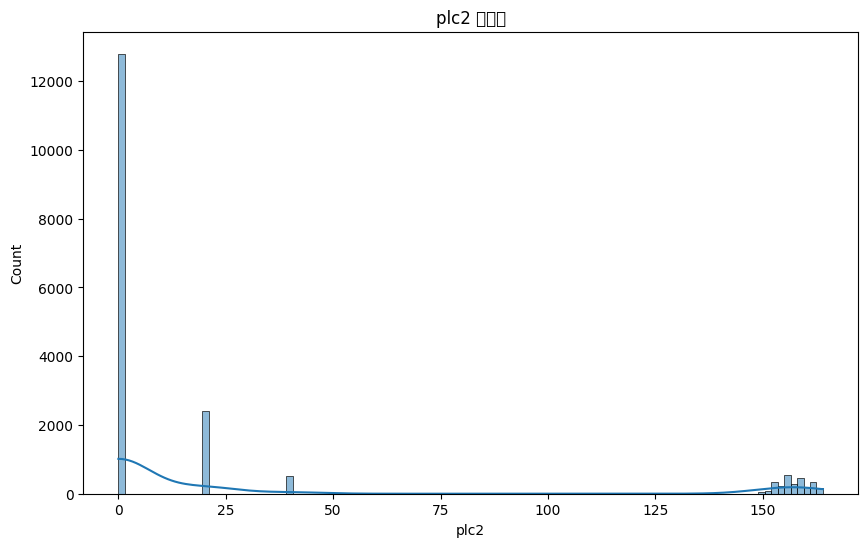

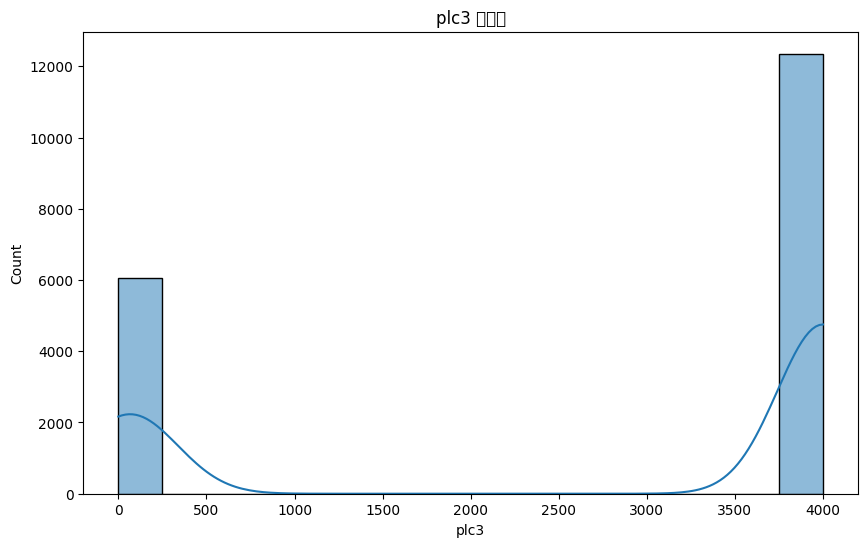

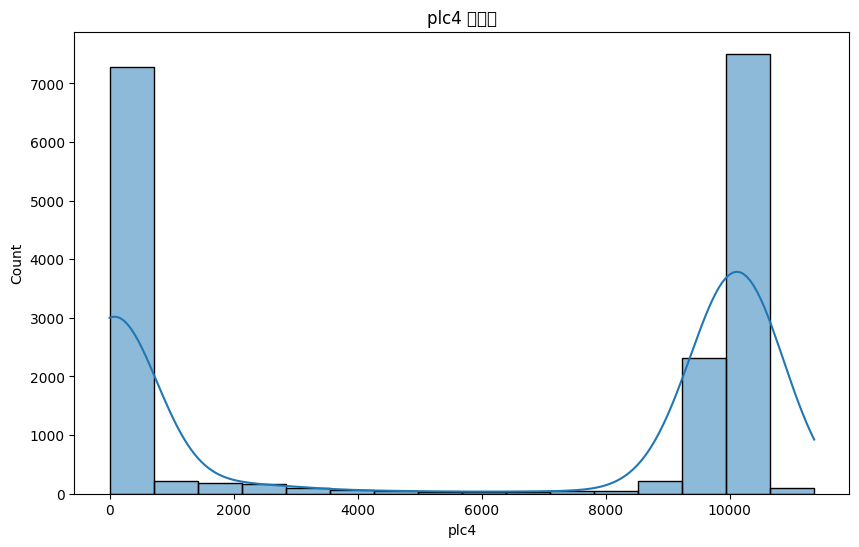

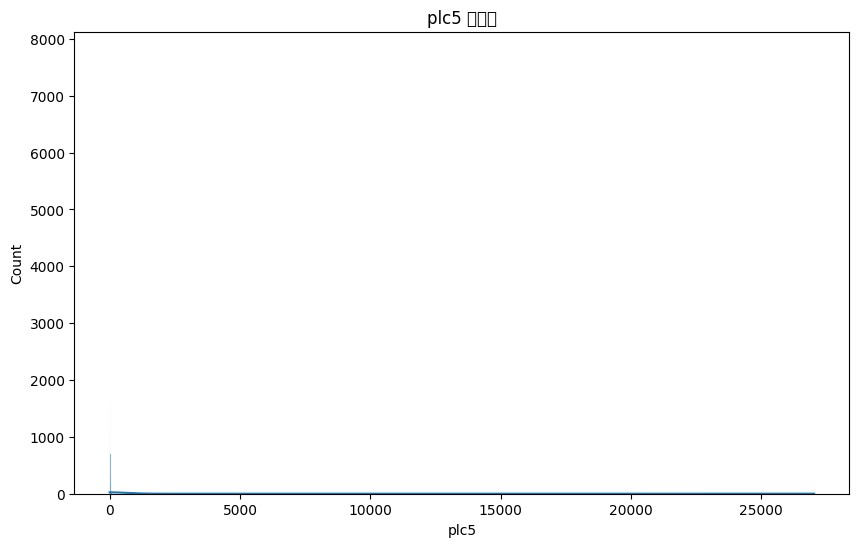

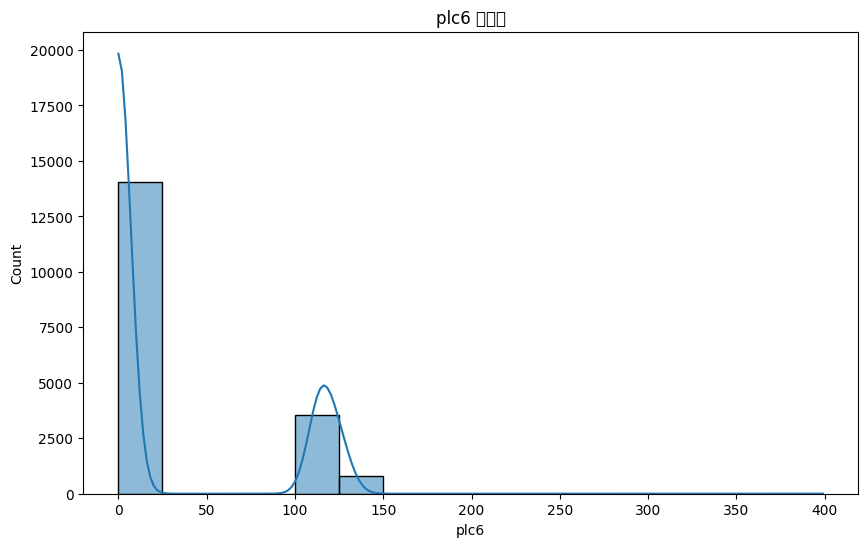

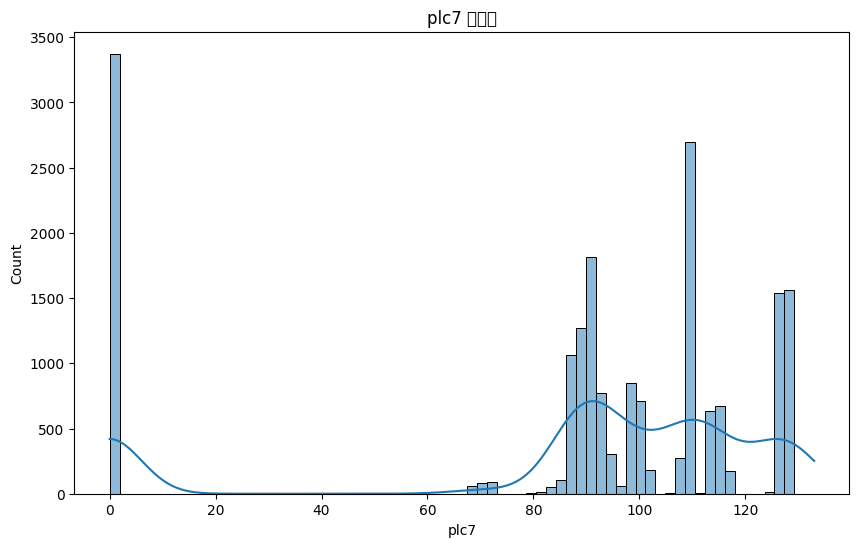

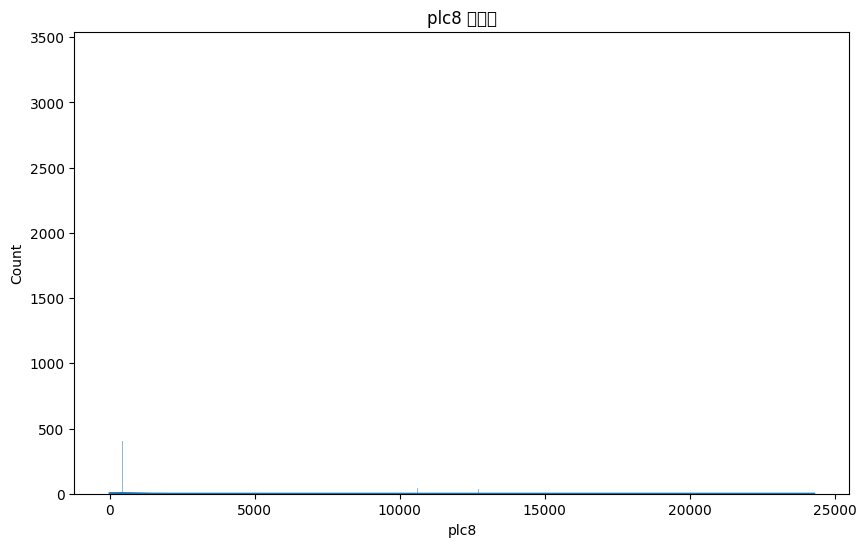

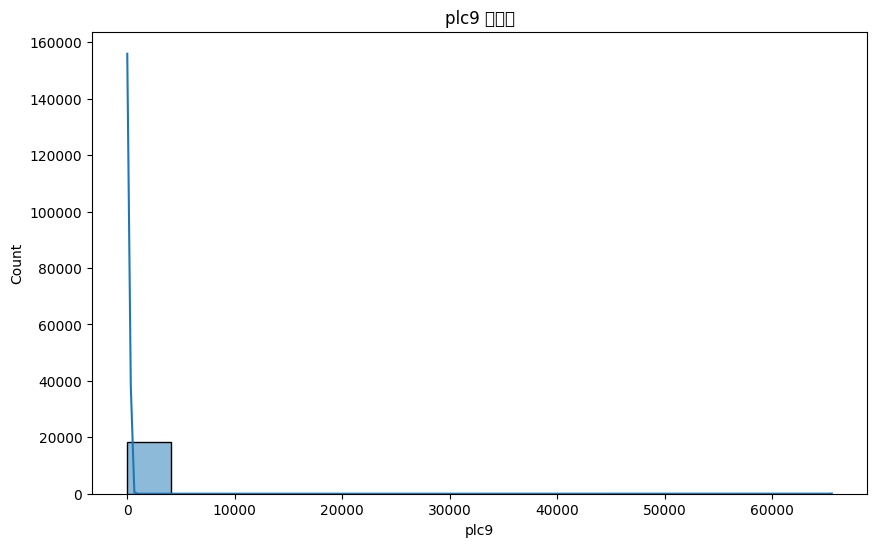

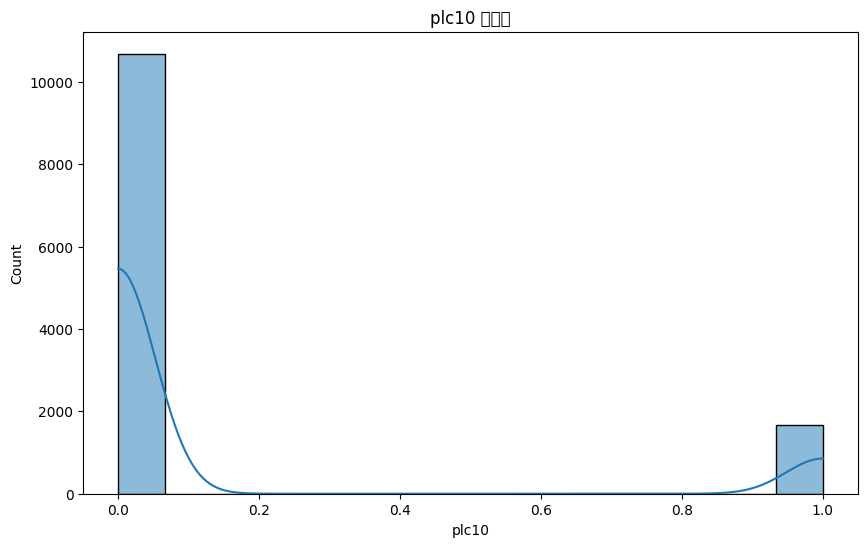

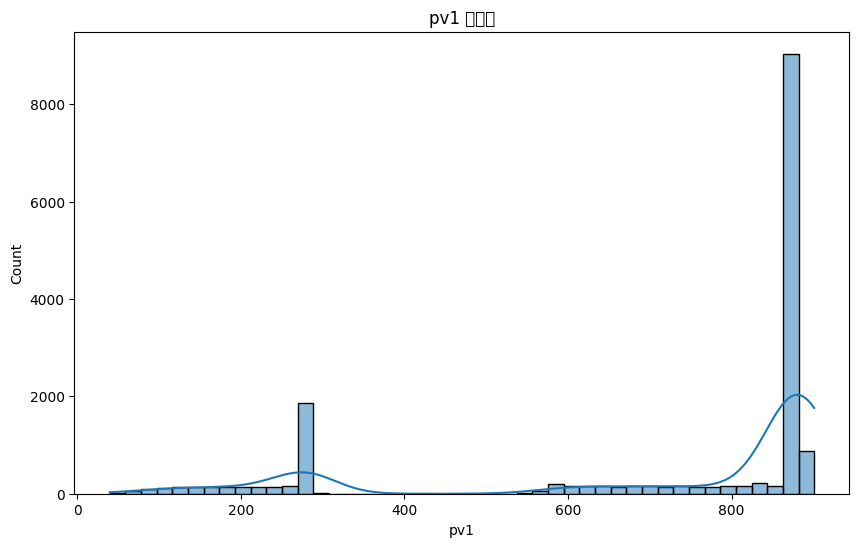

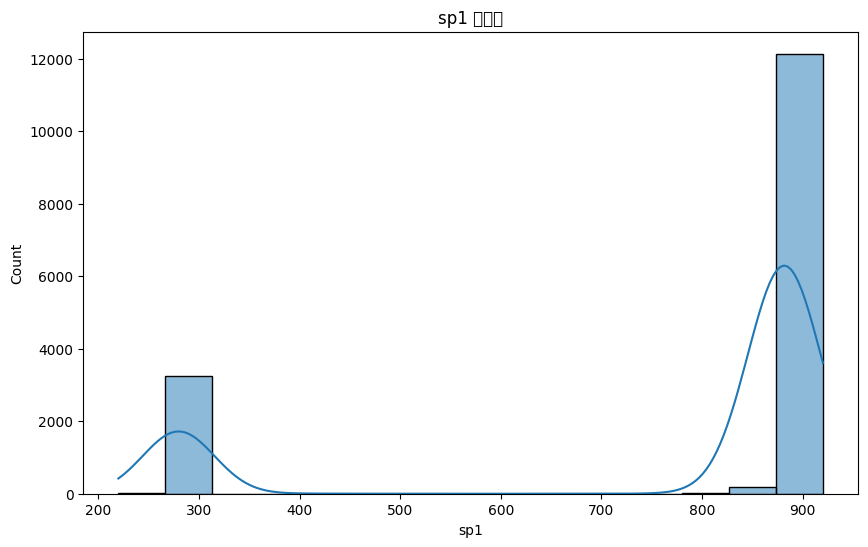

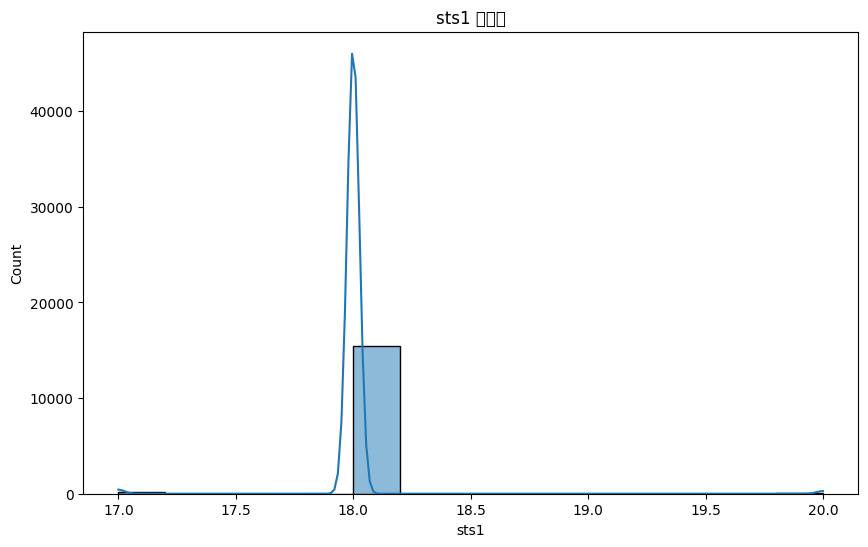

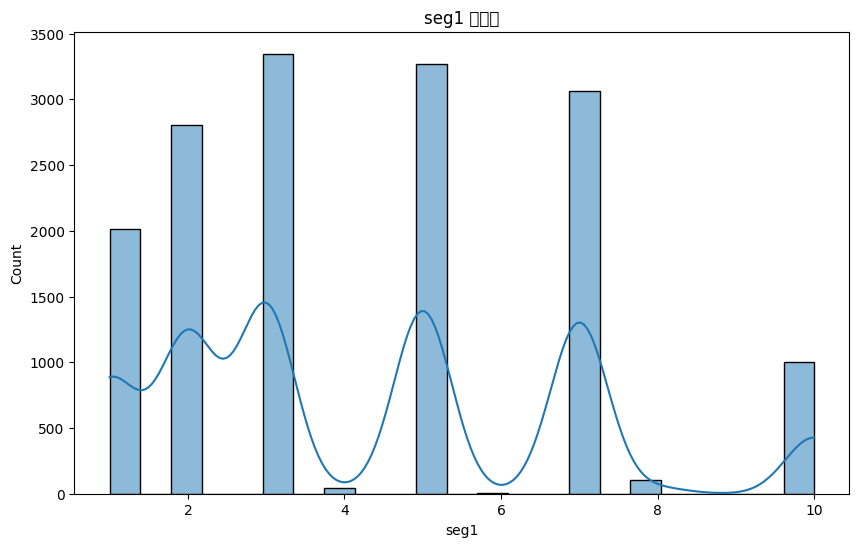

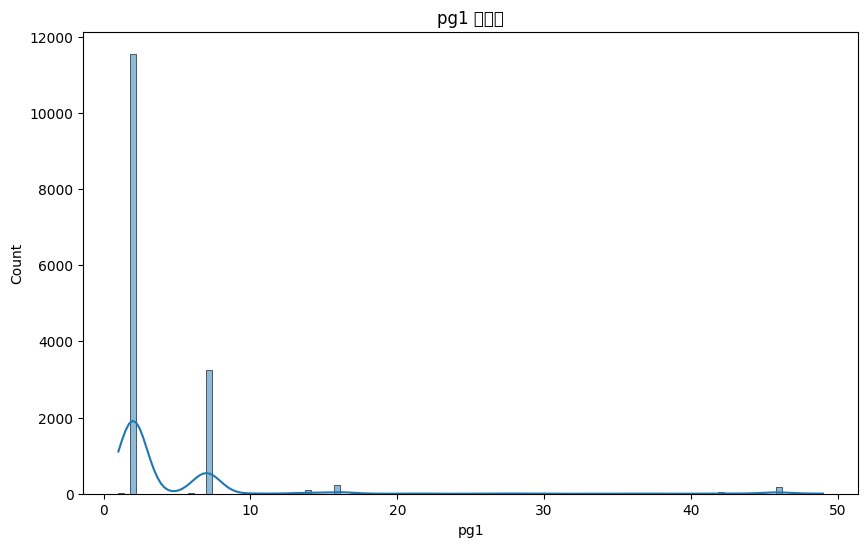

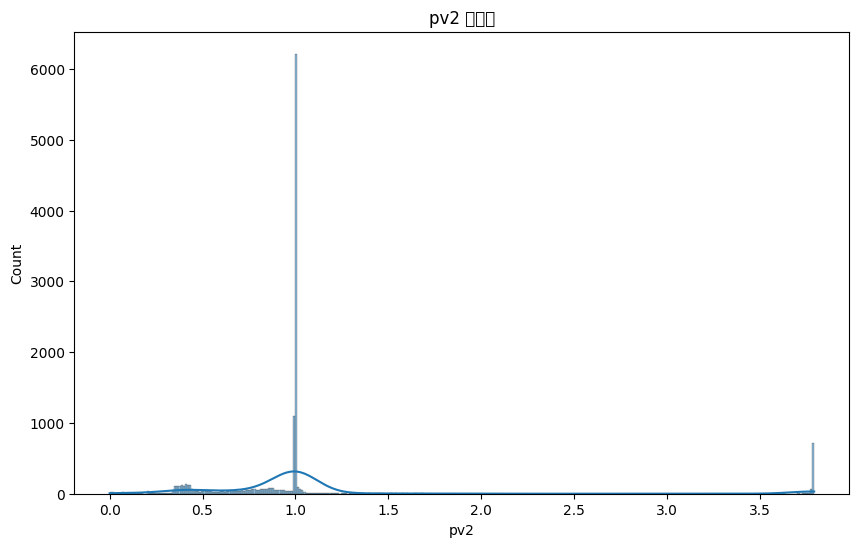

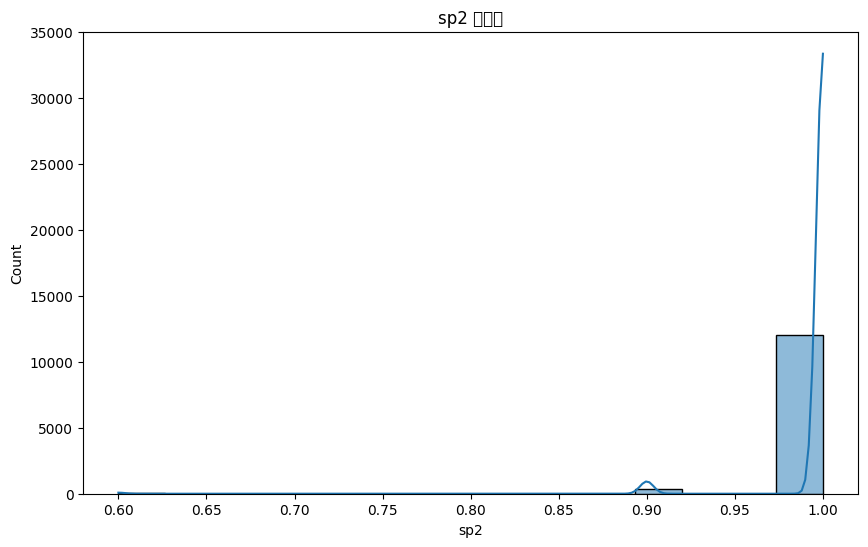

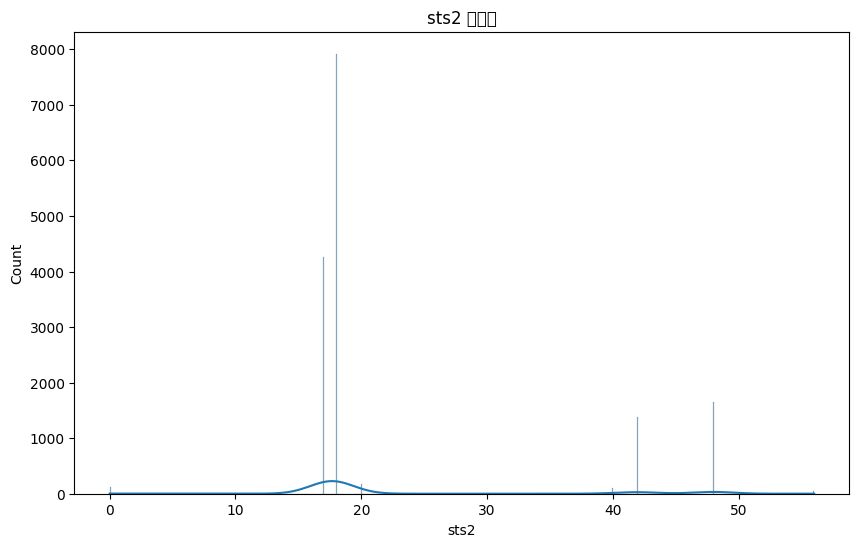

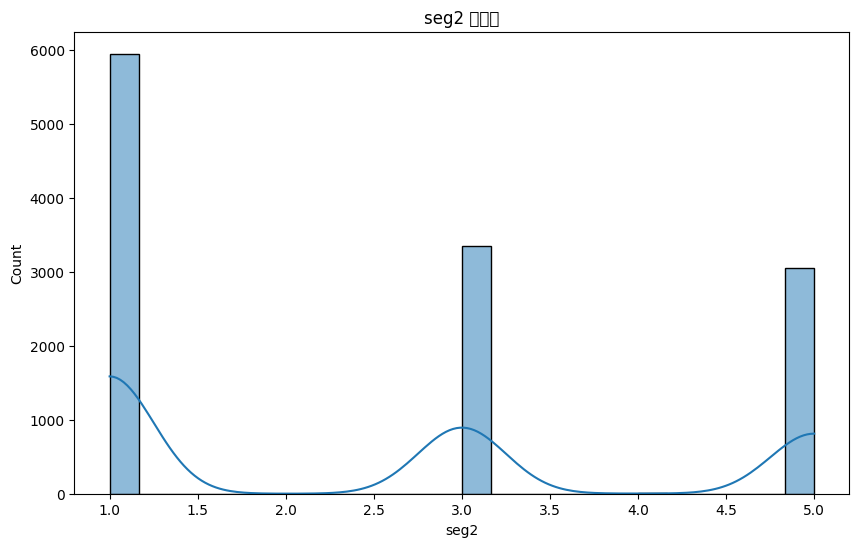

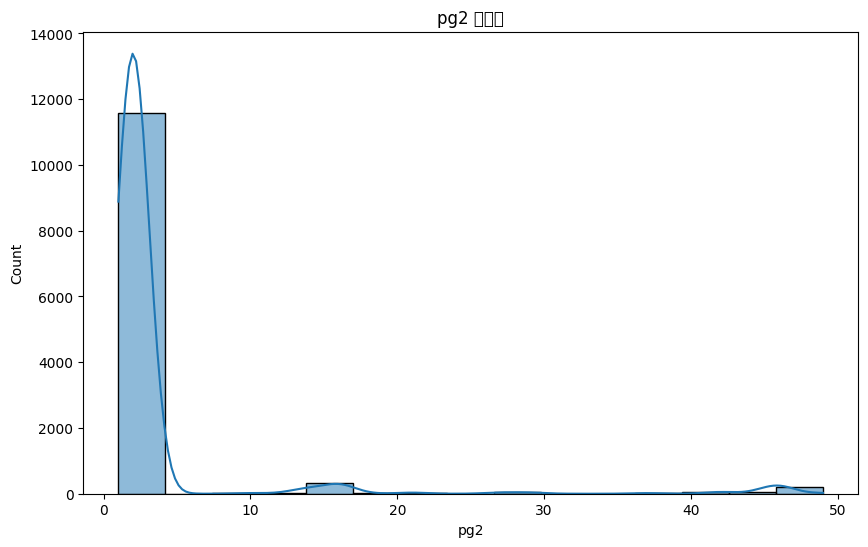

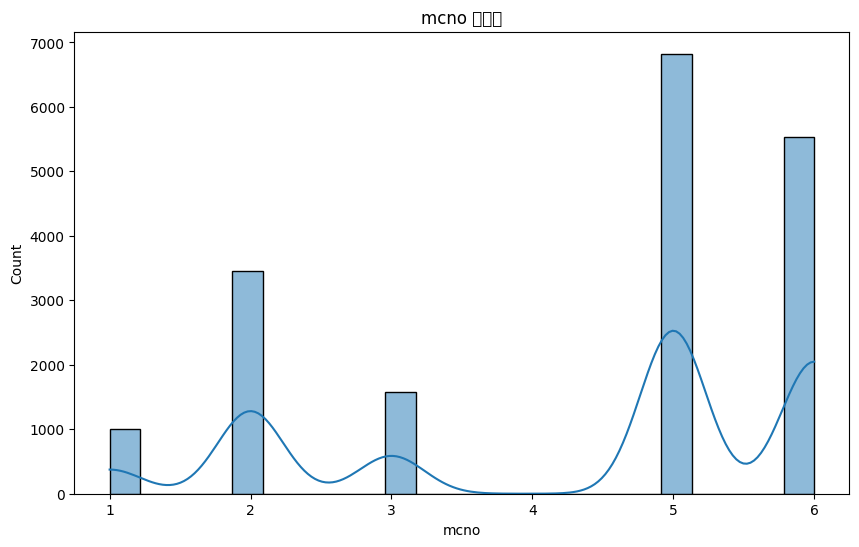

d:\aiml\skc_ai\venv_skc_ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26465 (\N{CJK UNIFIED IDEOGRAPH-6761}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\aiml\skc_ai\venv_skc_ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


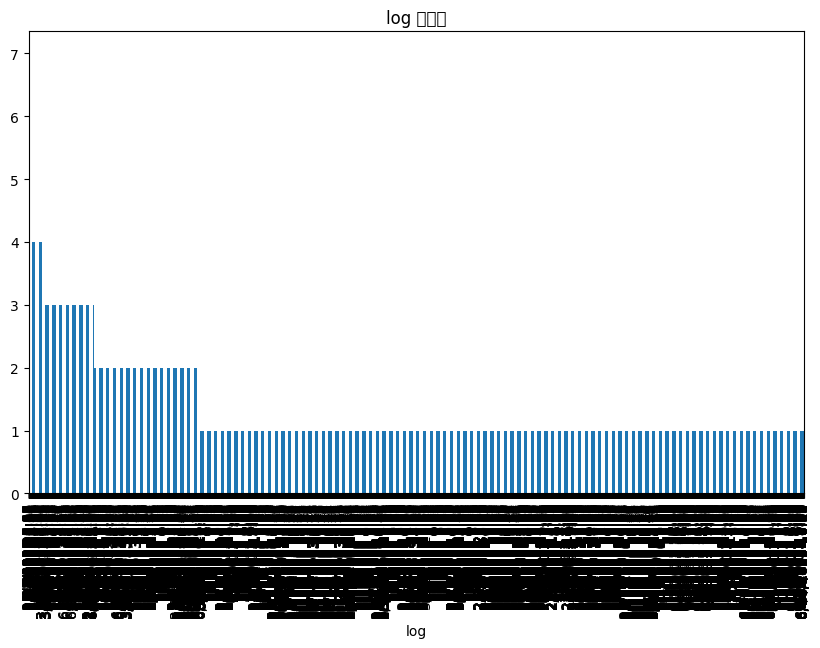

In [62]:
# 单变量分析
# 数值变量
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} 直方图')
    plt.savefig(f'images/{col}_histogram.png')

# 分类变量
for col in df.select_dtypes(include=[object]).columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} 条形图')
    plt.savefig(f'images/{col}_bar.png')

# 双变量分析
# 数值变量之间
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.savefig('images/numeric_pairplot.png')

# 数值与分类变量之间
for col in df.select_dtypes(include=[object]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=df.select_dtypes(include=[np.number]).columns[0], data=df)
    plt.title(f'{col} vs 数值变量 箱线图')
    plt.savefig(f'images/{col}_boxplot.png')

# 多变量分析
# 热力图
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('相关性热力图')
plt.savefig('images/heatmap.png')

# 主成分分析（PCA）
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.select_dtypes(include=[np.number]).dropna())
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA 结果')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.savefig('images/pca.png')

# 时间序列分析（假设有时间序列数据）
# 这里假设'date'是时间列
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.plot()
    plt.title('时间序列图')
    plt.savefig('images/time_series.png')

    # 季节性分析
    df.resample('M').mean().plot()
    plt.title('月度平均趋势')
    plt.savefig('images/monthly_trend.png')

In [ ]:
# 自动化EDA (探索性数据分析) 项目
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import datetime
import warnings
import missingno as msno
from IPython.display import display, HTML, Markdown
from pandas.api.types import is_numeric_dtype, is_datetime64_any_dtype, is_categorical_dtype
import ipywidgets as widgets
from ipywidgets import interact
from scipy import stats

# 忽略警告
warnings.filterwarnings('ignore')

# 创建图片保存目录
if not os.path.exists('images'):
    os.makedirs('images')

# 定义函数：加载数据
def load_data():
    """加载data文件夹中的数据文件"""
    data_folder = 'data'
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)
        print(f"已创建 {data_folder} 文件夹。请将数据文件放入该文件夹中，然后重新运行。")
        return None
    
    files = [f for f in os.listdir(data_folder) if f.endswith(('.csv', '.xlsx', '.xls'))]
    
    if not files:
        print(f"未在 {data_folder} 文件夹中找到任何CSV或Excel文件。请先添加文件，然后重新运行。")
        return None
    
    print("在data文件夹中找到以下文件:")
    for i, file in enumerate(files):
        print(f"{i+1}. {file}")
    
    file_idx = int(input(f"请选择要分析的文件编号 (1-{len(files)}): ")) - 1
    file_path = os.path.join(data_folder, files[file_idx])
    
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        df = pd.read_excel(file_path)
    
    print(f"已成功加载 {files[file_idx]}，数据形状为: {df.shape}")
    return df

# 定义函数：数据概览
def data_overview(df):
    """提供数据的基本概览"""
    print("\n======== 数据基本信息 ========")
    print(f"数据行数: {df.shape[0]}")
    print(f"数据列数: {df.shape[1]}")
    
    # 数据类型摘要
    dtypes = df.dtypes.value_counts()
    print("\n数据类型分布:")
    for dtype, count in dtypes.items():
        print(f"- {dtype}: {count}列")
    
    # 查看数据前5行
    print("\n数据前5行预览:")
    display(df.head())
    
    # 显示列信息
    print("\n列信息:")
    column_info = pd.DataFrame({
        '数据类型': df.dtypes,
        '非空值数量': df.count(),
        '空值数量': df.isnull().sum(),
        '空值百分比': (df.isnull().sum() / len(df) * 100).round(2),
        '唯一值数量': df.nunique()
    })
    column_info['空值百分比'] = column_info['空值百分比'].astype(str) + '%'
    display(column_info)
    
    # 缺失值可视化
    plt.figure(figsize=(12, 6))
    msno.matrix(df)
    plt.title('缺失值矩阵图')
    plt.tight_layout()
    plt.savefig('images/missing_values_matrix.png')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    msno.bar(df)
    plt.title('缺失值条形图')
    plt.tight_layout()
    plt.savefig('images/missing_values_bar.png')
    plt.show()
    
    # 基本统计信息
    print("\n数值列的统计描述:")
    display(df.describe().T)
    
    # 分类列的统计描述
    cat_columns = df.select_dtypes(include=['object', 'category']).columns
    if not cat_columns.empty:
        print("\n分类列的统计描述:")
        cat_stats = pd.DataFrame({
            '唯一值数量': df[cat_columns].nunique(),
            '最常见值': [df[col].value_counts().index[0] if not df[col].value_counts().empty else None for col in cat_columns],
            '最常见值频次': [df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0 for col in cat_columns],
            '最常见值占比': [(df[col].value_counts().iloc[0] / df[col].count() * 100).round(2) if not df[col].value_counts().empty else 0 for col in cat_columns]
        })
        cat_stats['最常见值占比'] = cat_stats['最常见值占比'].astype(str) + '%'
        display(cat_stats)

# 定义函数：处理缺失值
def handle_missing_values(df):
    """处理数据中的缺失值"""
    missing_cols = df.columns[df.isnull().any()].tolist()
    
    if not missing_cols:
        print("数据中没有缺失值，无需处理。")
        return df
    
    print(f"\n======== 缺失值处理 ========")
    print(f"发现以下{len(missing_cols)}列含有缺失值:")
    
    for col in missing_cols:
        missing_pct = (df[col].isnull().sum() / len(df) * 100).round(2)
        print(f"- {col}: {df[col].isnull().sum()}个缺失值 ({missing_pct}%)")
    
    strategies = {
        '删除': '删除含有缺失值的行',
        '均值填充': '对数值列使用均值填充',
        '中位数填充': '对数值列使用中位数填充',
        '众数填充': '对分类列使用众数填充',
        '0填充': '使用0填充缺失值',
        '指定值填充': '使用指定的值填充缺失值',
        '不处理': '保留缺失值不做处理'
    }
    
    print("\n可用的缺失值处理策略:")
    for key, desc in strategies.items():
        print(f"- {key}: {desc}")
    
    strategy = input("\n请选择缺失值处理策略 (默认为不处理): ") or '不处理'
    
    if strategy not in strategies:
        print(f"未知策略: {strategy}，将默认不处理缺失值。")
        return df
    
    df_clean = df.copy()
    
    if strategy == '删除':
        df_clean = df.dropna()
        print(f"已删除含有缺失值的行，数据形状从 {df.shape} 变为 {df_clean.shape}")
    
    elif strategy == '均值填充':
        for col in missing_cols:
            if pd.api.types.is_numeric_dtype(df[col]):
                df_clean[col] = df[col].fillna(df[col].mean())
                print(f"已对列 '{col}' 使用均值 {df[col].mean():.2f} 填充")
            else:
                print(f"列 '{col}' 不是数值类型，跳过均值填充")
    
    elif strategy == '中位数填充':
        for col in missing_cols:
            if pd.api.types.is_numeric_dtype(df[col]):
                df_clean[col] = df[col].fillna(df[col].median())
                print(f"已对列 '{col}' 使用中位数 {df[col].median():.2f} 填充")
            else:
                print(f"列 '{col}' 不是数值类型，跳过中位数填充")
    
    elif strategy == '众数填充':
        for col in missing_cols:
            mode_value = df[col].mode()[0]
            df_clean[col] = df[col].fillna(mode_value)
            print(f"已对列 '{col}' 使用众数 '{mode_value}' 填充")
    
    elif strategy == '0填充':
        for col in missing_cols:
            df_clean[col] = df[col].fillna(0)
            print(f"已对列 '{col}' 使用0填充")
    
    elif strategy == '指定值填充':
        for col in missing_cols:
            fill_value = input(f"请输入用于填充列 '{col}' 的值: ")
            # 尝试转换为原始列的数据类型
            try:
                if pd.api.types.is_numeric_dtype(df[col]):
                    fill_value = float(fill_value)
                df_clean[col] = df[col].fillna(fill_value)
                print(f"已对列 '{col}' 使用 '{fill_value}' 填充")
            except:
                print(f"无法将 '{fill_value}' 转换为合适的类型，跳过此列")
    
    elif strategy == '不处理':
        print("保留缺失值不做处理")
    
    return df_clean

# 定义函数：检测并处理异常值
def handle_outliers(df):
    """检测并处理数据中的异常值"""
    print("\n======== 异常值检测与处理 ========")
    
    # 只对数值列进行异常值检测
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    if not numeric_cols:
        print("数据中没有数值列，无法检测异常值。")
        return df
    
    print(f"使用IQR方法检测异常值 (数值列: {len(numeric_cols)}列)")
    
    outliers_summary = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_pct = (len(outliers) / len(df) * 100).round(2)
        
        if not outliers.empty:
            outliers_summary[col] = {
                'count': len(outliers),
                'percentage': outlier_pct,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
    
    if not outliers_summary:
        print("未检测到异常值。")
        return df
    
    print("\n检测到以下列存在异常值:")
    for col, stats in outliers_summary.items():
        print(f"- {col}: {stats['count']}个异常值 ({stats['percentage']}%), 范围: [{stats['lower_bound']:.2f}, {stats['upper_bound']:.2f}]")
    
    # 绘制箱线图来展示异常值
    n_cols = min(3, len(outliers_summary))
    n_rows = (len(outliers_summary) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(n_cols*5, n_rows*4))
    for i, col in enumerate(outliers_summary.keys()):
        plt.subplot(n_rows, n_cols, i+1)
        sns.boxplot(x=df[col])
        plt.title(f"{col}的箱线图")
        plt.tight_layout()
    plt.savefig('images/outliers_boxplot.png')
    plt.show()
    
    strategies = {
        '删除': '删除含有异常值的行',
        '替换为上下界': '将异常值替换为上下界值',
        '替换为均值': '将异常值替换为均值',
        '替换为中位数': '将异常值替换为中位数',
        '不处理': '保留异常值不做处理'
    }
    
    print("\n可用的异常值处理策略:")
    for key, desc in strategies.items():
        print(f"- {key}: {desc}")
    
    strategy = input("\n请选择异常值处理策略 (默认为不处理): ") or '不处理'
    
    if strategy not in strategies:
        print(f"未知策略: {strategy}，将默认不处理异常值。")
        return df
    
    df_clean = df.copy()
    
    if strategy == '删除':
        original_shape = df_clean.shape
        for col in outliers_summary.keys():
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        
        print(f"已删除含有异常值的行，数据形状从 {original_shape} 变为 {df_clean.shape}")
    
    elif strategy == '替换为上下界':
        for col in outliers_summary.keys():
            stats = outliers_summary[col]
            lower_bound = stats['lower_bound']
            upper_bound = stats['upper_bound']
            
            # 将小于下界的值替换为下界值
            df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
            # 将大于上界的值替换为上界值
            df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
            
            print(f"已将 '{col}' 列的异常值替换为上下界: [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    elif strategy == '替换为均值':
        for col in outliers_summary.keys():
            stats = outliers_summary[col]
            lower_bound = stats['lower_bound']
            upper_bound = stats['upper_bound']
            mean_value = df[col].mean()
            
            # 替换异常值为均值
            mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
            df_clean.loc[mask, col] = mean_value
            
            print(f"已将 '{col}' 列的异常值替换为均值: {mean_value:.2f}")
    
    elif strategy == '替换为中位数':
        for col in outliers_summary.keys():
            stats = outliers_summary[col]
            lower_bound = stats['lower_bound']
            upper_bound = stats['upper_bound']
            median_value = df[col].median()
            
            # 替换异常值为中位数
            mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
            df_clean.loc[mask, col] = median_value
            
            print(f"已将 '{col}' 列的异常值替换为中位数: {median_value:.2f}")
    
    elif strategy == '不处理':
        print("保留异常值不做处理")
    
    return df_clean

# 定义函数：识别目标变量
def identify_target(df):
    """让用户指定目标变量"""
    print("\n======== 目标变量设置 ========")
    print("当前数据集列:")
    for i, col in enumerate(df.columns):
        print(f"{i+1}. {col}")
    
    target_idx = input("\n请输入目标变量的列编号 (如不需要目标变量请直接回车): ")
    
    if not target_idx:
        print("未指定目标变量，将进行无监督分析。")
        return df, None
    
    try:
        target_idx = int(target_idx) - 1
        if 0 <= target_idx < len(df.columns):
            target_column = df.columns[target_idx]
            print(f"已选择 '{target_column}' 作为目标变量。")
            return df, target_column
        else:
            print(f"列编号 {target_idx+1} 超出范围，将进行无监督分析。")
            return df, None
    except:
        print("输入的不是有效的列编号，将进行无监督分析。")
        return df, None

# 定义函数：时间序列分析
def time_series_analysis(df):
    """执行时间序列分析"""
    print("\n======== 时间序列分析 ========")
    
    # 寻找可能的日期列
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower() or is_datetime64_any_dtype(df[col])]
    
    if not date_cols:
        print("未发现明显的日期/时间列，尝试将每一列转换为日期。")
        date_cols = []
        for col in df.columns:
            if df[col].dtype == 'object':
                try:
                    pd.to_datetime(df[col])
                    date_cols.append(col)
                except:
                    pass
    
    if not date_cols:
        print("无法识别任何日期/时间列，跳过时间序列分析。")
        return
    
    print("检测到以下可能的日期/时间列:")
    for i, col in enumerate(date_cols):
        print(f"{i+1}. {col}")
    
    date_idx = input("\n请选择用于时间序列分析的日期列编号 (默认为1): ") or "1"
    
    try:
        date_idx = int(date_idx) - 1
        if 0 <= date_idx < len(date_cols):
            date_column = date_cols[date_idx]
        else:
            print(f"列编号 {date_idx+1} 超出范围，使用第一个日期列。")
            date_column = date_cols[0]
    except:
        print("输入的不是有效的列编号，使用第一个日期列。")
        date_column = date_cols[0]
    
    print(f"使用 '{date_column}' 进行时间序列分析。")
    
    # 确保日期列的格式正确
    if not is_datetime64_any_dtype(df[date_column]):
        try:
            df[date_column] = pd.to_datetime(df[date_column])
        except:
            print(f"无法将 '{date_column}' 列转换为日期格式，跳过时间序列分析。")
            return
    
    # 按日期排序
    df_sorted = df.sort_values(by=date_column)
    
    # 选择数值列进行时间序列分析
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    if not numeric_cols:
        print("数据中没有数值列，无法进行时间序列分析。")
        return
    
    # 根据列数量决定图表布局
    n_cols = min(2, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    # 绘制时间序列图
    plt.figure(figsize=(15, n_rows * 5))
    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i+1)
        plt.plot(df_sorted[date_column], df_sorted[col])
        plt.title(f"{col}随时间的变化趋势")
        plt.xlabel(date_column)
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
    plt.savefig(f"images/time_series_trend.png")
    plt.show()
    
    # 季节性分析
    # 检测数据的时间粒度
    try:
        time_diff = df_sorted[date_column].diff().dropna().min()
        
        # 根据时间差判断可能的季节性周期
        periods = []
        
        if time_diff.days < 1:  # 小于一天，可能是小时级数据
            print("检测到小时级数据，尝试按小时分析季节性。")
            df_sorted['hour'] = df_sorted[date_column].dt.hour
            periods.append(('hour', 24))
        
        if time_diff.days <= 1:  # 天级数据
            print("检测到天级数据，尝试按星期/月分析季节性。")
            df_sorted['dayofweek'] = df_sorted[date_column].dt.dayofweek
            df_sorted['month'] = df_sorted[date_column].dt.month
            periods.append(('dayofweek', 7))
            periods.append(('month', 12))
        
        if time_diff.days <= 31:  # 月级数据
            print("检测到月级数据，尝试按月/季度分析季节性。")
            if 'month' not in df_sorted.columns:
                df_sorted['month'] = df_sorted[date_column].dt.month
            df_sorted['quarter'] = df_sorted[date_column].dt.quarter
            periods.append(('month', 12))
            periods.append(('quarter', 4))
        
        # 绘制季节性图表
        for period_name, period_length in periods:
            for col in numeric_cols:
                plt.figure(figsize=(12, 6))
                sns.boxplot(x=period_name, y=col, data=df_sorted)
                plt.title(f"{col}按{period_name}的季节性分布")
                plt.xlabel(period_name)
                plt.ylabel(col)
                plt.tight_layout()
                plt.savefig(f"images/seasonality_{col}_by_{period_name}.png")
                plt.show()
    
    except Exception as e:
        print(f"季节性分析时遇到错误: {e}")

# 定义函数：单变量分析
def univariate_analysis(df, target_column=None):
    """执行单变量分析"""
    print("\n======== 单变量分析 ========")
    
    # 数值列分析
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    if target_column in numeric_cols:
        numeric_cols.remove(target_column)
    
    if numeric_cols:
        print(f"\n数值变量分析 ({len(numeric_cols)}列):")
        
        # 统计描述
        print("\n数值变量的统计描述:")
        numeric_summary = df[numeric_cols].describe().T
        numeric_summary['偏度'] = df[numeric_cols].skew()
        numeric_summary['峰度'] = df[numeric_cols].kurtosis()
        display(numeric_summary)
        
        # 直方图和密度图
        n_cols = min(3, len(numeric_cols))
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        plt.figure(figsize=(n_cols*5, n_rows*4))
        for i, col in enumerate(numeric_cols):
            plt.subplot(n_rows, n_cols, i+1)
            sns.histplot(df[col], kde=True)
            plt.title(f"{col}的分布")
            plt.tight_layout()
        plt.savefig('images/numeric_distribution.png')
        plt.show()
        
        # 与目标变量的关系(如果有目标变量)
        if target_column and is_numeric_dtype(df[target_column]):
            print(f"\n数值变量与目标变量 '{target_column}' 的相关性:")
            correlations = df[numeric_cols + [target_column]].corr()[target_column].sort_values(ascending=False)
            display(pd.DataFrame(correlations, columns=['相关系数']).drop(target_column))
            
            # 绘制与目标变量的散点图
            n_cols = min(3, len(numeric_cols))
            n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
            
            plt.figure(figsize=(n_cols*5, n_rows*4))
            for i, col in enumerate(numeric_cols):
                plt.subplot(n_rows, n_cols, i+1)
                plt.scatter(df[col], df[target_column], alpha=0.5)
                plt.title(f"{col} vs {target_column}")
                plt.xlabel(col)
                plt.ylabel(target_column)
                plt.tight_layout()
            plt.savefig(f'images/scatter_with_{target_column}.png')
            plt.show()
    
    # 分类列分析
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if target_column in cat_cols:
        cat_cols.remove(target_column)
    
    if cat_cols:
        print(f"\n分类变量分析 ({len(cat_cols)}列):")
        
        # 频率分析
        for col in cat_cols:
            print(f"\n'{col}'的频率分布:")
            value_counts = df[col].value_counts()
            value_pcts = df[col].value_counts(normalize=True).round(4) * 100
            display(pd.DataFrame({
                '频次': value_counts,
                '百分比': value_pcts.astype(str) + '%'
            }))
            
            # 绘制条形图
            plt.figure(figsize=(10, 6))
            sns.countplot(y=col, data=df, order=value_counts.index)
            plt.title(f"{col}的分布")
            plt.tight_layout()
            plt.savefig(f'images/{col}_distribution.png')
            plt.show()
            
            # 与目标变量的关系(如果有目标变量)
            if target_column:
                if is_numeric_dtype(df[target_column]):
                    # 如果目标变量是数值型，绘制箱线图
                    plt.figure(figsize=(12, 6))
                    sns.boxplot(x=col, y=target_column, data=df)
                    plt.title(f"{target_column} by {col}")
                    plt.xticks(rotation=45)
                    plt.tight_layout()
                    plt.savefig(f'images/{target_column}_by_{col}.png')
                    plt.show()
                    
                    # ANOVA检验
                    try:
                        categories = df[col].unique()
                        if len(categories) > 1 and len(categories) < 50:  # 限制类别数量，避免过多类别导致计算问题
                            groups = [df[df[col] == category][target_column].dropna() for category in categories]
                            f_val, p_val = stats.f_oneway(*groups)
                            print(f"ANOVA检验 - F值: {f_val:.4f}, p值: {p_val:.4f}")
                            if p_val < 0.05:
                                print(f"结论：'{col}'的不同类别对'{target_column}'有显著影响 (p < 0.05)")
                            else:
                                print(f"结论：'{col}'的不同类别对'{target_column}'没有显著影响 (p >= 0.05)")
                    except:
                        print("无法执行ANOVA检验。")
                
                elif col != target_column:
                    # 如果目标变量也是分类型，创建交叉表
                    cross_tab = pd.crosstab(df[col], df[target_column], normalize='index') * 100
                    print(f"\n'{col}'与'{target_column}'的交叉表 (行百分比):")
                    display(cross_tab.round(2))
                    
                    # 绘制堆积条形图
                    plt.figure(figsize=(12, 6))
                    cross_tab.plot(kind='bar', stacked=True)
                    plt.title(f"{col} by {target_column} (%)")
                    plt.legend(title=target_column)
                    plt.tight_layout()
                    plt.savefig(f'

# 识别目标变量

In [ ]:
def identify_target(df):
    """让用户指定目标变量"""
    print("\n======== 目标变量设置 ========")
    print("当前数据集列:")
    for i, col in enumerate(df.columns):
        print(f"{i+1}. {col}")
    
    target_idx = input("\n请输入目标变量的列编号 (如不需要目标变量请直接回车): ")
    
    if not target_idx:
        print("未指定目标变量，将进行无监督分析。")
        return df, None
    
    try:
        target_idx = int(target_idx) - 1
        if 0 <= target_idx < len(df.columns):
            target_column = df.columns[target_idx]
            print(f"已选择 '{target_column}' 作为目标变量。")
            return df, target_column
        else:
            print(f"列编号 {target_idx+1} 超出范围，将进行无监督分析。")
            return df, None
    except:
        print("输入的不是有效的列编号，将进行无监督分析。")
        return df, None

In [ ]:
identify_target(df)


======== 目标变量设置 ========
当前数据集列:
1. lotlogid
2. lottrackid
3. type
4. log
5. status1
6. status2
7. trayno
8. maept
9. hfcno
10. hfchp
11. yakitemp
12. ajihz
13. atopt
14. tfhp
15. keiro
16. tuuka
17. plc0
18. plc1
19. plc2
20. plc3
21. plc4
22. plc5
23. plc6
24. plc7
25. plc8
26. plc9
27. plc10
28. pv1
29. sp1
30. sts1
31. seg1
32. pg1
33. pv2
34. sp2
35. sts2
36. seg2
37. pg2
38. mcno
39. acnc
已选择 'acnc' 作为目标变量。


(       lotlogid  lottrackid  type              log  status1  status2  trayno  \
 0      31519041      357301    10    2/2/2023 9:25        1        1     557   
 1      31519042      357301    10    2/2/2023 9:25      115        1     557   
 2      31519050      357301    10    2/2/2023 9:26       -1        1     557   
 3      31519058      357301    10    2/2/2023 9:27       -1        1     557   
 4      31519059      357301    10    2/2/2023 9:27      115        2     557   
 ...         ...         ...   ...              ...      ...      ...     ...   
 18403  32500530      359771    40  6/16/2023 10:25       -1        3      52   
 18404  32500535      359771    40  6/16/2023 10:26       -1        3      52   
 18405  32500542      359771    40  6/16/2023 10:27       -1        3      52   
 18406  32500545      359771    40  6/16/2023 10:27        0        3      52   
 18407  32500550      359771    40  6/16/2023 10:28       -1        0      52   
 
        maept  hfcno  hfch

In [ ]:
identify_target(df)

# 时间序列分析

In [ ]:
# 将细到分钟的数据提取出天的数据
date_colum = df['log'].dt.date

In [ ]:
from pandas.api.types import is_numeric_dtype, is_datetime64_any_dtype, is_categorical_dtype

In [ ]:
def time_series_analysis(df):
    """执行时间序列分析"""
    print("\n======== 时间序列分析 ========")
    
    # 寻找可能的日期列
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower() or is_datetime64_any_dtype(df[col])]
    
    if not date_cols:
        print("未发现明显的日期/时间列，尝试将每一列转换为日期。")
        date_cols = []
        for col in df.columns:
            if df[col].dtype == 'object':
                try:
                    pd.to_datetime(df[col])
                    date_cols.append(col)
                except:
                    pass
    
    if not date_cols:
        print("无法识别任何日期/时间列，跳过时间序列分析。")
        return
    
    print("检测到以下可能的日期/时间列:")
    for i, col in enumerate(date_cols):
        print(f"{i+1}. {col}")
    
    date_idx = input("\n请选择用于时间序列分析的日期列编号 (默认为1): ") or "1"
    
    try:
        date_idx = int(date_idx) - 1
        if 0 <= date_idx < len(date_cols):
            date_column = date_cols[date_idx]
        else:
            print(f"列编号 {date_idx+1} 超出范围，使用第一个日期列。")
            date_column = date_cols[0]
    except:
        print("输入的不是有效的列编号，使用第一个日期列。")
        date_column = date_cols[0]
    
    print(f"使用 '{date_column}' 进行时间序列分析。")
    
    # 确保日期列的格式正确
    if not is_datetime64_any_dtype(df[date_column]):
        try:
            df[date_column] = pd.to_datetime(df[date_column])
        except:
            print(f"无法将 '{date_column}' 列转换为日期格式，跳过时间序列分析。")
            return
    
    # 按日期排序
    df_sorted = df.sort_values(by=date_column)
    
    # 选择数值列进行时间序列分析
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    if not numeric_cols:
        print("数据中没有数值列，无法进行时间序列分析。")
        return
    
    # 根据列数量决定图表布局
    n_cols = min(2, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    # 绘制时间序列图
    plt.figure(figsize=(15, n_rows * 5))
    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i+1)
        plt.plot(df_sorted[date_column], df_sorted[col])
        plt.title(f"{col}随时间的变化趋势")
        plt.xlabel(date_column)
        plt.ylabel(col)
        plt.xticks(rotation=45)
        # 关键时间点设置，critical_times应该怎么定义？
        # for time in critical_times:
        #     plt.axvline(x=time, color='r', linestyle='--', linewidth=1)
        plt.tight_layout()
    plt.savefig(f"images/time_series_trend.png")
    plt.show()
    
    # 季节性分析
    # 检测数据的时间粒度
    try:
        time_diff = df_sorted[date_column].diff().dropna().min()
        
        # 根据时间差判断可能的季节性周期
        periods = []
        
        if time_diff.days < 1:  # 小于一天，可能是小时级数据
            print("检测到小时级数据，尝试按小时分析季节性。")
            df_sorted['hour'] = df_sorted[date_column].dt.hour
            periods.append(('hour', 24))
        
        if time_diff.days <= 1:  # 天级数据
            print("检测到天级数据，尝试按星期/月分析季节性。")
            df_sorted['dayofweek'] = df_sorted[date_column].dt.dayofweek
            df_sorted['month'] = df_sorted[date_column].dt.month
            periods.append(('dayofweek', 7))
            periods.append(('month', 12))
        
        if time_diff.days <= 31:  # 月级数据
            print("检测到月级数据，尝试按月/季度分析季节性。")
            if 'month' not in df_sorted.columns:
                df_sorted['month'] = df_sorted[date_column].dt.month
            df_sorted['quarter'] = df_sorted[date_column].dt.quarter
            periods.append(('month', 12))
            periods.append(('quarter', 4))
        
        # 绘制季节性图表
        for period_name, period_length in periods:
            for col in numeric_cols:
                plt.figure(figsize=(12, 6))
                sns.boxplot(x=period_name, y=col, data=df_sorted)
                plt.title(f"{col}按{period_name}的季节性分布")
                plt.xlabel(period_name)
                plt.ylabel(col)
                plt.tight_layout()
                plt.savefig(f"images/seasonality_{col}_by_{period_name}.png")
                plt.show()
    
    except Exception as e:
        print(f"季节性分析时遇到错误: {e}")

# 单变量分析

In [ ]:
def univariate_analysis(df, target_column=None):
    """执行单变量分析"""
    print("\n======== 单变量分析 ========")
    
    # 数值列分析
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    if target_column in numeric_cols:
        numeric_cols.remove(target_column)
    
    if numeric_cols:
        print(f"\n数值变量分析 ({len(numeric_cols)}列):")
        
        # 统计描述
        print("\n数值变量的统计描述:")
        numeric_summary = df[numeric_cols].describe().T
        numeric_summary['偏度'] = df[numeric_cols].skew()
        numeric_summary['峰度'] = df[numeric_cols].kurtosis()
        display(numeric_summary)
        
        # 直方图和密度图
        n_cols = min(3, len(numeric_cols))
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        plt.figure(figsize=(n_cols*5, n_rows*4))
        for i, col in enumerate(numeric_cols):
            plt.subplot(n_rows, n_cols, i+1)
            sns.histplot(df[col], kde=True)
            plt.title(f"{col}的分布")
            plt.tight_layout()
        plt.savefig('images/numeric_distribution.png')
        plt.show()
        
        # 与目标变量的关系(如果有目标变量)
        if target_column and is_numeric_dtype(df[target_column]):
            print(f"\n数值变量与目标变量 '{target_column}' 的相关性:")
            correlations = df[numeric_cols + [target_column]].corr()[target_column].sort_values(ascending=False)
            display(pd.DataFrame(correlations, columns=['相关系数']).drop(target_column))
            
            # 绘制与目标变量的散点图
            n_cols = min(3, len(numeric_cols))
            n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
            
            plt.figure(figsize=(n_cols*5, n_rows*4))
            for i, col in enumerate(numeric_cols):
                plt.subplot(n_rows, n_cols, i+1)
                plt.scatter(df[col], df[target_column], alpha=0.5)
                plt.title(f"{col} vs {target_column}")
                plt.xlabel(col)
                plt.ylabel(target_column)
                plt.tight_layout()
            plt.savefig(f'images/scatter_with_{target_column}.png')
            plt.show()
    
    # 分类列分析
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if target_column in cat_cols:
        cat_cols.remove(target_column)
    
    if cat_cols:
        print(f"\n分类变量分析 ({len(cat_cols)}列):")
        
        # 频率分析
        for col in cat_cols:
            print(f"\n'{col}'的频率分布:")
            value_counts = df[col].value_counts()
            value_pcts = df[col].value_counts(normalize=True).round(4) * 100
            display(pd.DataFrame({
                '频次': value_counts,
                '百分比': value_pcts.astype(str) + '%'
            }))
            
            # 绘制条形图
            plt.figure(figsize=(10, 6))
            sns.countplot(y=col, data=df, order=value_counts.index)
            plt.title(f"{col}的分布")
            plt.tight_layout()
            plt.savefig(f'images/{col}_distribution.png')
            plt.show()
            
            # 与目标变量的关系(如果有目标变量)
            if target_column:
                if is_numeric_dtype(df[target_column]):
                    # 如果目标变量是数值型，绘制箱线图
                    plt.figure(figsize=(12, 6))
                    sns.boxplot(x=col, y=target_column, data=df)
                    plt.title(f"{target_column} by {col}")
                    plt.xticks(rotation=45)
                    plt.tight_layout()
                    plt.savefig(f'images/{target_column}_by_{col}.png')
                    plt.show()
                    
                    # ANOVA检验
                    try:
                        categories = df[col].unique()
                        if len(categories) > 1 and len(categories) < 50:  # 限制类别数量，避免过多类别导致计算问题
                            groups = [df[df[col] == category][target_column].dropna() for category in categories]
                            f_val, p_val = stats.f_oneway(*groups)
                            print(f"ANOVA检验 - F值: {f_val:.4f}, p值: {p_val:.4f}")
                            if p_val < 0.05:
                                print(f"结论：'{col}'的不同类别对'{target_column}'有显著影响 (p < 0.05)")
                            else:
                                print(f"结论：'{col}'的不同类别对'{target_column}'没有显著影响 (p >= 0.05)")
                    except:
                        print("无法执行ANOVA检验。")
                
                elif col != target_column:
                    # 如果目标变量也是分类型，创建交叉表
                    cross_tab = pd.crosstab(df[col], df[target_column], normalize='index') * 100
                    print(f"\n'{col}'与'{target_column}'的交叉表 (行百分比):")
                    display(cross_tab.round(2))
                    
                    # 绘制堆积条形图
                    plt.figure(figsize=(12, 6))
                    cross_tab.plot(kind='bar', stacked=True)
                    plt.title(f"{col} by {target_column} (%)")
                    plt.legend(title=target_column)
                    plt.tight_layout()
                    plt.savefig(f'images/{col}_by_{target_column}_stacked.png')
                    plt.show()
                    
                    # 卡方检验（如果样本量足够）
                    try:
                        contingency_table = pd.crosstab(df[col], df[target_column])
                        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
                            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
                            print(f"卡方检验 - 卡方值: {chi2:.4f}, p值: {p:.4f}, 自由度: {dof}")
                            if p < 0.05:
                                print(f"结论：'{col}'与'{target_column}'之间存在显著相关性 (p < 0.05)")
                            else:
                                print(f"结论：'{col}'与'{target_column}'之间不存在显著相关性 (p >= 0.05)")
                    except:
                        print("无法执行卡方检验。")

# 双变量分析

In [ ]:
def bivariate_analysis(df, target_column=None):
    """执行二变量分析"""
    print("\n======== 二变量分析 ========")
    
    # 数值变量之间的关系
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    if target_column in numeric_cols and is_numeric_dtype(df[target_column]):
        numeric_cols.remove(target_column)
    
    if len(numeric_cols) > 1:
        print("\n数值变量之间的关系:")
        
        # 相关性分析
        correlation_matrix = df[numeric_cols].corr().round(2)
        print("\n相关系数矩阵:")
        display(correlation_matrix)
        
        # 散点图矩阵
        print("\n散点图矩阵 (仅显示部分变量，最多10个):")
        if len(numeric_cols) > 10:
            print("(注: 变量太多，仅显示相关性最强的10个变量)")
            # 选择相关性最强的10个变量
            if target_column and is_numeric_dtype(df[target_column]):
                # 如果有目标变量，选择与目标变量相关性最强的
                target_corrs = correlation_matrix[target_column].drop(target_column).abs().sort_values(ascending=False)
                selected_cols = target_corrs.index[:10].tolist()
            else:
                # 否则选择整体相关性最强的
                mean_corrs = correlation_matrix.abs().mean().sort_values(ascending=False)
                selected_cols = mean_corrs.index[:10].tolist()
        else:
            selected_cols = numeric_cols
        
        # 绘制散点图矩阵
        sns.pairplot(df[selected_cols], height=2.5)
        plt.tight_layout()
        plt.savefig('images/numeric_pairplot.png')
        plt.show()
    
    # 数值变量与分类变量之间的关系
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if target_column in cat_cols:
        cat_cols.remove(target_column)
    
    if numeric_cols and cat_cols:
        print("\n数值变量与分类变量之间的关系:")
        
        # 限制变量数量
        max_numeric = min(5, len(numeric_cols))
        max_cat = min(5, len(cat_cols))
        
        # 选择要显示的变量
        selected_numeric = numeric_cols[:max_numeric]
        selected_cat = cat_cols[:max_cat]
        
        print(f"显示 {len(selected_numeric)} 个数值变量与 {len(selected_cat)} 个分类变量之间的关系")
        
        # 为每对变量创建箱线图或小提琴图
        for cat_col in selected_cat:
            # 检查唯一值数量
            n_unique = df[cat_col].nunique()
            
            if n_unique > 10:
                print(f"'{cat_col}'的类别过多 ({n_unique}个)，跳过可视化")
                continue
            
            for num_col in selected_numeric:
                plt.figure(figsize=(12, 6))
                
                # 如果类别少，使用小提琴图
                if n_unique <= 5:
                    sns.violinplot(x=cat_col, y=num_col, data=df)
                    plot_type = "violinplot"
                # 否则使用箱线图
                else:
                    sns.boxplot(x=cat_col, y=num_col, data=df)
                    plot_type = "boxplot"
                
                plt.title(f"{num_col} by {cat_col}")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig(f'images/{num_col}_by_{cat_col}_{plot_type}.png')
                plt.show()
    
    # 分类变量之间的关系
    if len(cat_cols) > 1:
        print("\n分类变量之间的关系:")
        
        # 限制变量对数量
        max_pairs = 5
        pairs_count = 0
        
        for i, col1 in enumerate(cat_cols):
            if pairs_count >= max_pairs:
                break
                
            for col2 in cat_cols[i+1:]:
                if pairs_count >= max_pairs:
                    break
                
                # 检查唯一值数量
                n_unique1 = df[col1].nunique()
                n_unique2 = df[col2].nunique()
                
                if n_unique1 > 10 or n_unique2 > 10:
                    print(f"'{col1}'或'{col2}'的类别过多，跳过可视化")
                    continue
                
                # 创建列联表
                cross_tab = pd.crosstab(df[col1], df[col2])
                print(f"\n'{col1}'与'{col2}'的列联表:")
                display(cross_tab)
                
                # 绘制堆积条形图
                plt.figure(figsize=(12, 6))
                cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
                cross_tab_pct.plot(kind='bar', stacked=True)
                plt.title(f"{col1} by {col2} (%)")
                plt.legend(title=col2)
                plt.tight_layout()
                plt.savefig(f'images/{col1}_by_{col2}_stacked.png')
                plt.show()
                
                pairs_count += 1


# 多变量分析

In [ ]:
def multivariate_analysis(df, target_column=None):
    """执行多变量分析"""
    print("\n======== 多变量分析 ========")
    
    # 热力图 - 相关性矩阵
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    if len(numeric_cols) > 1:
        print("\n相关性热力图:")
        
        # 计算相关性矩阵
        corr_matrix = df[numeric_cols].corr()
        
        # 绘制热力图
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # 创建掩码以隐藏上三角
        sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
                    vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
        plt.title('相关性热力图')
        plt.tight_layout()
        plt.savefig('images/correlation_heatmap.png')
        plt.show()
    
        # 主成分分析 (PCA)
        print("\n主成分分析 (PCA):")
        
        # 数据预处理
        pca_df = df[numeric_cols].copy()
        pca_df = pca_df.dropna()  # 移除含有缺失值的行
        
        if len(pca_df) > 10:  # 确保有足够的数据进行PCA
            # 标准化数据
            scaler = StandardScaler()
            scaled_data = scaler.fit_transform(pca_df)
            
            # 执行PCA
            n_components = min(len(numeric_cols), 10)  # 最多10个主成分
            pca = PCA(n_components=n_components)
            pca_result = pca.fit_transform(scaled_data)
            
            # 计算解释的方差比例
            explained_variance = pca.explained_variance_ratio_ * 100
            cumulative_variance = np.cumsum(explained_variance)
            
            # 输出结果
            print("\n主成分解释的方差比例:")
            for i, var in enumerate(explained_variance):
                print(f"主成分 {i+1}: {var:.2f}% (累计: {cumulative_variance[i]:.2f}%)")
            
            # 绘制解释方差图
            plt.figure(figsize=(10, 6))
            plt.bar(range(1, n_components+1), explained_variance, alpha=0.6, label='单个方差')
            plt.step(range(1, n_components+1), cumulative_variance, where='mid', label='累计方差')
            plt.axhline(y=80, color='r', linestyle='--', label='80% 方差阈值')
            plt.xlabel('主成分')
            plt.ylabel('解释的方差 (%)')
            plt.title('主成分分析 - 解释的方差')
            plt.legend()
            plt.tight_layout()
            plt.savefig('images/pca_explained_variance.png')
            plt.show()
            
            # 绘制前两个主成分的散点图
            if n_components >= 2:
                plt.figure(figsize=(10, 8))
                plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
                plt.xlabel(f'主成分 1 ({explained_variance[0]:.2f}%)')
                plt.ylabel(f'主成分 2 ({explained_variance[1]:.2f}%)')
                plt.title('PCA - 前两个主成分')
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.savefig('images/pca_scatter.png')
                plt.show()
                
                # 如果有目标变量，按目标变量着色
                if target_column and is_categorical_dtype(df[target_column]) and df[target_column].nunique() <= 10:
                    plt.figure(figsize=(10, 8))
                    target_values = df.loc[pca_df.index, target_column]
                    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target_values.astype('category').cat.codes, 
                                         alpha=0.7, cmap='viridis')
                    plt.xlabel(f'主成分 1 ({explained_variance[0]:.2f}%)')
                    plt.ylabel(f'主成分 2 ({explained_variance[1]:.2f}%)')
                    plt.title(f'PCA - 按 {target_column} 着色')
                    plt.grid(True, alpha=0.3)
                    plt.colorbar(scatter, label=target_column)
                    plt.tight_layout()
                    plt.savefig(f'images/pca_scatter_by_{target_column}.png')
                    plt.show()
                
                # 绘制负载图（特征权重）
                loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
                
                plt.figure(figsize=(12, 8))
                for i, feature in enumerate(numeric_cols):
                    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, fc='blue', ec='blue')
                    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, feature, color='green', fontsize=9)
                
                plt.xlim(-1, 1)
                plt.ylim(-1, 1)
                plt.xlabel(f'主成分 1 ({explained_variance[0]:.2f}%)')
                plt.ylabel(f'主成分 2 ({explained_variance[1]:.2f}%)')
                plt.title('PCA - 特征负载图')
                plt.grid(True, alpha=0.3)
                circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='gray', alpha=0.5)
                plt.gca().add_patch(circle)
                plt.tight_layout()
                plt.savefig('images/pca_loadings.png')
                plt.show()
        else:
            print("数据量不足，无法执行PCA分析。")
    else:
        print("数值变量不足，无法执行多变量分析。")


# 主程序调用

In [ ]:
def main():
    """主程序"""
    print("======== 自动化EDA分析 ========")
    print("本程序将执行以下分析:")
    print("1. 数据概览")
    print("2. 缺失值处理")
    print("3. 异常值处理")
    print("4. 单变量分析")
    print("5. 双变量分析")
    print("6. 多变量分析")
    print("7. 时间序列分析")
    
    # 加载数据
    df = load_data()
    if df is None:
        return
    
    # 数据概览
    data_overview(df)
    
    # 缺失值处理
    df_clean = handle_missing_values(df)
    
    # 异常值处理
    df_clean = handle_outliers(df_clean)
    
    # 识别目标变量
    df_clean, target_column = identify_target(df_clean)
    
    # 单变量分析
    univariate_analysis(df_clean, target_column)
    
    # 双变量分析
    bivariate_analysis(df_clean, target_column)
    
    # 多变量分析
    multivariate_analysis(df_clean, target_column)
    
    # 时间序列分析
    time_series_analysis(df_clean)
    
    print("\n======== EDA分析完成 ========")
    print(f"所有图表已保存到 'images' 文件夹")

if __name__ == "__main__":
    main()